# Table Of Contents
- Import 

- Extract And Read Data

- Get Information About The Data

- Data Preparation: 
    1. Find Percentage Of Missing Values 
    2. Converting Column Values 
    3. Changing Datatypes 
    4. Checking Duplicate 
    5. Find The Total Nights Stayed By Guests

- Descriptive Statistics

- EDA

- Relationships

- Drop Some Features

- Correlation: 
    1. Correlation Matrix 
    2. Heat Map

## Import

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew,kurtosis
import pylab as py
import time
import datetime
from datetime import datetime
from datetime import date


## Extract And Read Data

In [38]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


## Information About The Data

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Data Preparation

### Find Percentage Of Missing Values

In [40]:
df.isnull().sum().sort_values(ascending = False) / len(df)

company                           0.943069
agent                             0.136862
country                           0.004087
children                          0.000034
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
hotel                             0.000000
previous_cancellations            0.000000
days_in_waiting_list              0.000000
customer_type                     0.000000
adr                               0.000000
required_car_parking_spaces       0.000000
total_of_special_requests         0.000000
reservation_status                0.000000
previous_bookings_not_canceled    0.000000
is_repeated_guest                 0.000000
is_canceled                       0.000000
distribution_channel              0.000000
market_segment                    0.000000
meal                              0.000000
babies                            0.000000
adults     

#### Fill the missing values in "agent" and "company" column 

In [41]:
df["agent"].fillna(0, inplace = True)
df["company"].fillna(0, inplace = True)


#### Use mode to fill the NAN values in "country" column

In [42]:
df["country"].fillna(df["country"].mode()[0], inplace = True)

#### Remove rows with missing values in "children" column

In [43]:
df.dropna(subset = ["children"], axis = 0, inplace = True)

#### Check Missing Values

In [44]:
df.isnull().sum().sort_values().sum()

0

### Converting Column Values

#### Convert "Undefined" to "TA/TO" in the "distribution_channel" column

In [45]:
df["distribution_channel"].replace("Undefined", "TA/TO", inplace = True)

#### Convert Values Of The "meal" column

In [46]:
df["meal"].replace(["Undefined", "BB", "FB", "HB", "SC" ], 
["No Meal", "Breakfast", "Full Board", "Half Board", "No Meal"], inplace = True)

#### Convert Values Of "is_canceled" Column to "Cancelled" and "Not Cancelled" from 0 and 1

In [47]:
df["is_canceled"].replace([0, 1], ["Cancelled", "Not Cancelled"], inplace = True)

### Changing Datatypes

#### Convert datatypes of "children", "agent", "company" columns to integer

In [48]:
df["children"].astype(int)
df["agent"].astype(int)
df["company"].astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: company, Length: 119386, dtype: int32

#### Convert datatype of "reservation_status_date" column from object to datetime

In [49]:
pd.to_datetime(df["reservation_status_date"])

0        2015-01-07
1        2015-01-07
2        2015-02-07
3        2015-02-07
4        2015-03-07
            ...    
119385   2017-06-09
119386   2017-07-09
119387   2017-07-09
119388   2017-07-09
119389   2017-07-09
Name: reservation_status_date, Length: 119386, dtype: datetime64[ns]

### Checking Duplicates Values

In [50]:
df.duplicated().sum()

32013

#### Remove Duplicate Values

In [51]:
df.drop_duplicates(inplace = True)

#### Check Duplicates Values 

In [52]:
df.duplicated().sum()

0

## Find Total Night Stayed By Guests

In [53]:
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

## Descriptive Statistics

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,87373.0,79.909377,86.055917,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87373.0,2016.210328,0.686091,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87373.0,26.839859,13.673688,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87373.0,15.815630,8.834683,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87373.0,1.005402,1.031968,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87373.0,2.625662,2.053695,0.00,1.0,2.0,4.0,50.0
adults,87373.0,1.875888,0.626486,0.00,2.0,2.0,2.0,55.0
children,87373.0,0.138670,0.455926,0.00,0.0,0.0,0.0,10.0
babies,87373.0,0.010827,0.113611,0.00,0.0,0.0,0.0,10.0
is_repeated_guest,87373.0,0.039085,0.193799,0.00,0.0,0.0,0.0,1.0


## EDA

### Bookings By Hotels

City Hotel      53424
Resort Hotel    33949
Name: hotel, dtype: int64

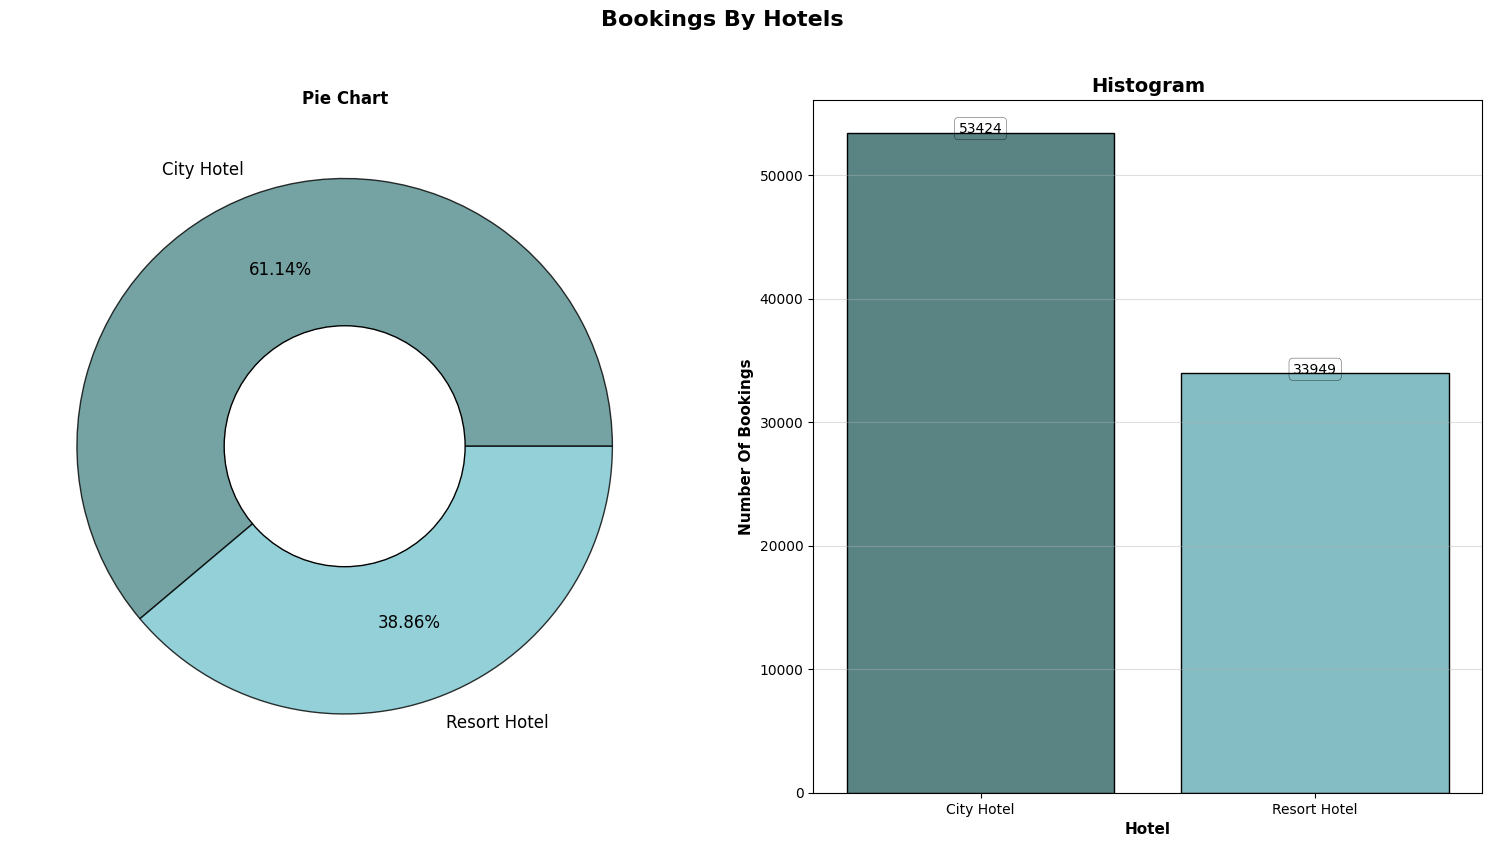

In [55]:
labels = ['City Hotel', 'Resort Hotel']
colors = ["#538B8B", "#7AC5CD"]
order = df['hotel'].value_counts().index
plt.figure(figsize = (19, 9))
plt.suptitle('Bookings By Hotels', fontweight = 'heavy', fontsize = '16',
            fontfamily = 'sans-serif', color = "black")
# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight = 'bold', fontfamily = "sans-serif", color = 'black')
plt.pie(df["hotel"].value_counts(), pctdistance = 0.7, autopct = '%.2f%%', labels = labels,
wedgeprops = dict(alpha = 0.8, edgecolor = "black"), textprops = {'fontsize': 12}, colors = colors)
centre = plt.Circle((0,0), 0.45, fc = "white", edgecolor = "black")
plt.gcf().gca().add_artist(centre)
# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title("Histogram", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "hotel", data = df, order = order, edgecolor = "black", palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Hotel", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.xticks([0, 1], labels)
plt.grid(axis = "y", alpha = 0.4)

df['hotel'].value_counts()

# Bookings By Market Segment

Online TA        51615
Offline TA/TO    13886
Direct           11797
Groups            4940
Corporate         4206
Complementary      702
Aviation           227
Name: market_segment, dtype: int64

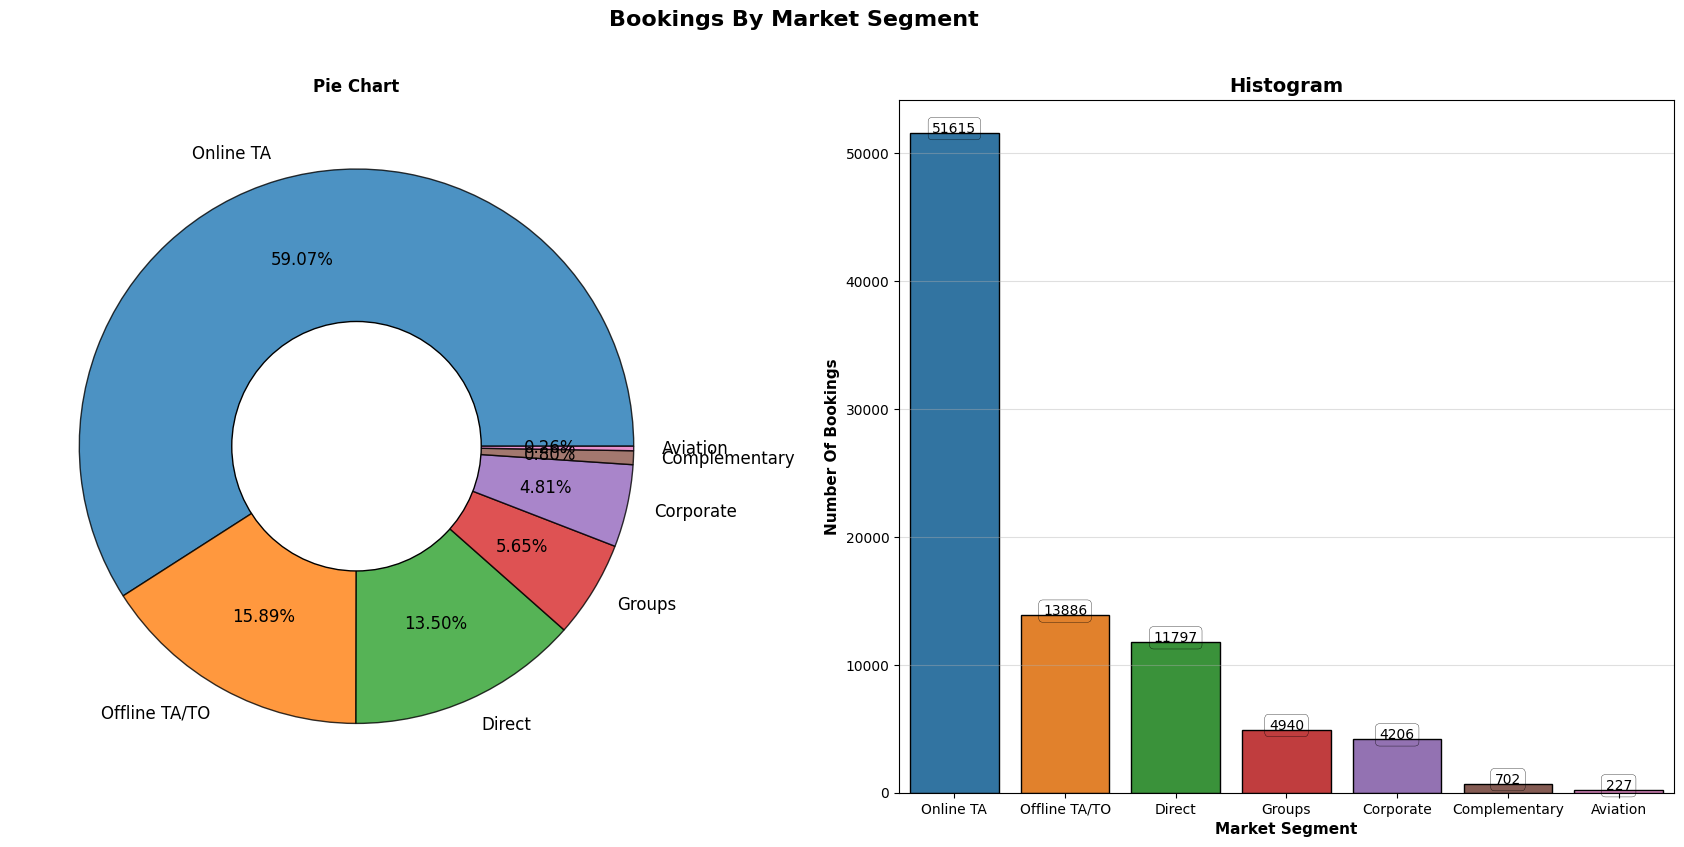

In [56]:
labels = ["Online TA", "Offline TA/TO", "Direct", "Groups", "Corporate", "Complementary", "Aviation"]
order = df['market_segment'].value_counts().index
plt.figure(figsize = (22, 9))
plt.suptitle('Bookings By Market Segment', fontweight = 'heavy', fontsize = '16',
            fontfamily = 'sans-serif', color = "black")
# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight = 'bold', fontfamily = "sans-serif", color = 'black')
plt.pie(df["market_segment"].value_counts(), pctdistance = 0.7, autopct = '%.2f%%', labels = labels,
wedgeprops = dict(alpha = 0.8, edgecolor = "black"), textprops = {'fontsize': 12})
centre = plt.Circle((0,0), 0.45, fc = "white", edgecolor = "black")
plt.gcf().gca().add_artist(centre)
# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title("Histogram", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "market_segment", data = df, order = order, edgecolor = "black",)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Market Segment", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df['market_segment'].value_counts()

### Bookings By Distribution Channels

TA/TO        69137
Direct       12980
Corporate     5075
GDS            181
Name: distribution_channel, dtype: int64

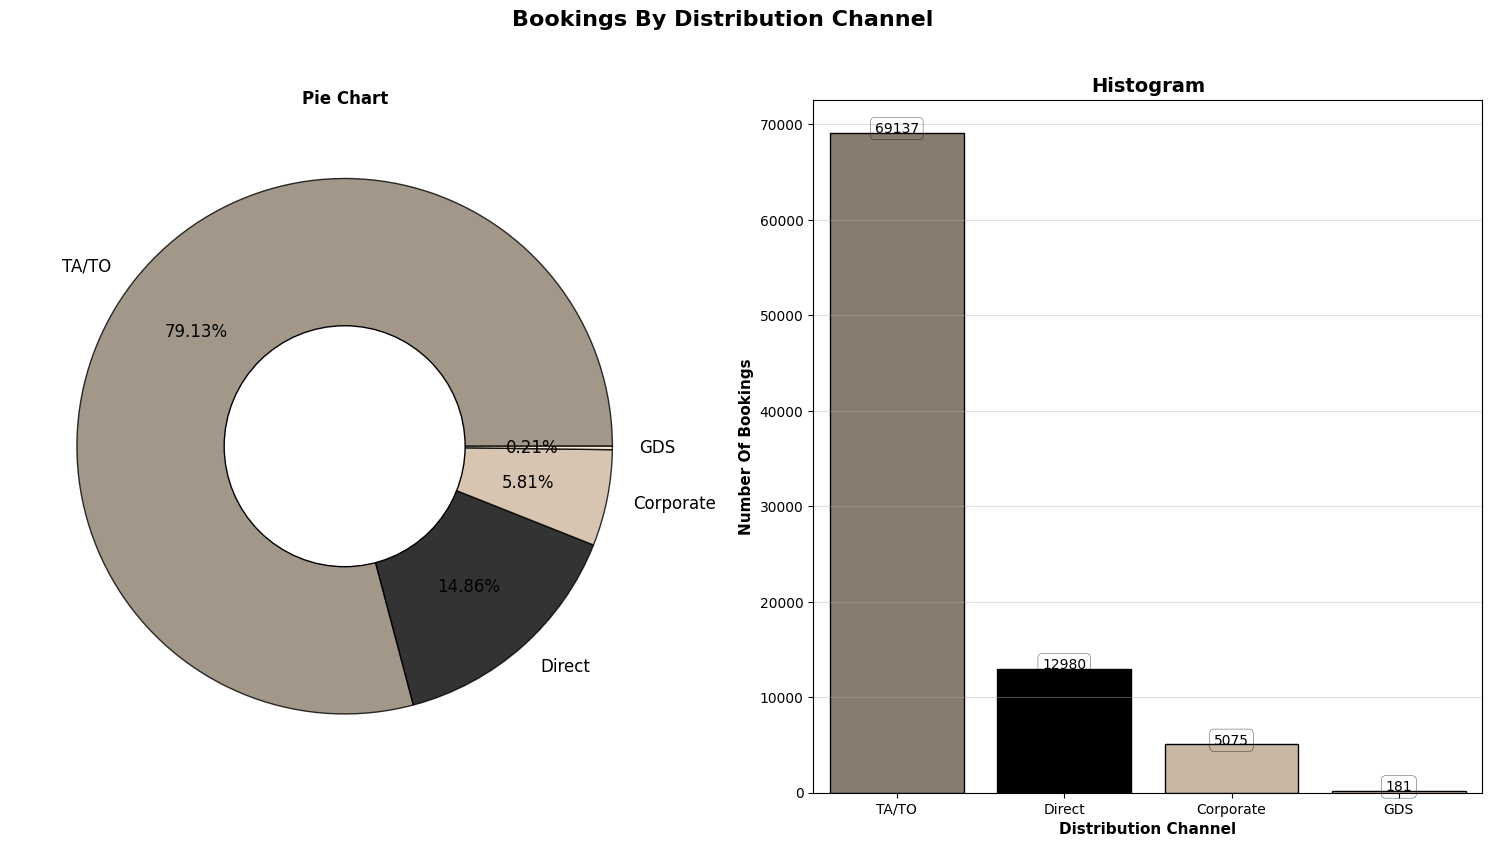

In [57]:
colors = ["#8B7D6B", "#000000", "#CDB79E", "#FFE4C4"]
labels = ["TA/TO", "Direct", "Corporate", "GDS"]
order = df['distribution_channel'].value_counts().index
plt.figure(figsize = (19, 9))
plt.suptitle('Bookings By Distribution Channel', fontweight = 'heavy', fontsize = '16',
            fontfamily = 'sans-serif', color = "black")
# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight = 'bold', fontfamily = "sans-serif", color = 'black')
plt.pie(df["distribution_channel"].value_counts(), pctdistance = 0.7, autopct = '%.2f%%', labels = labels, colors = colors,
wedgeprops = dict(alpha = 0.8, edgecolor = "black"), textprops = {'fontsize': 12})
centre = plt.Circle((0,0), 0.45, fc = "white", edgecolor = "black")
plt.gcf().gca().add_artist(centre)
# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title("Histogram", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "distribution_channel", data = df, order = order, edgecolor = "black", palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Distribution Channel", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df['distribution_channel'].value_counts()

### Bookings By Meals

Breakfast     67958
No Meal        9971
Half Board     9084
Full Board      360
Name: meal, dtype: int64

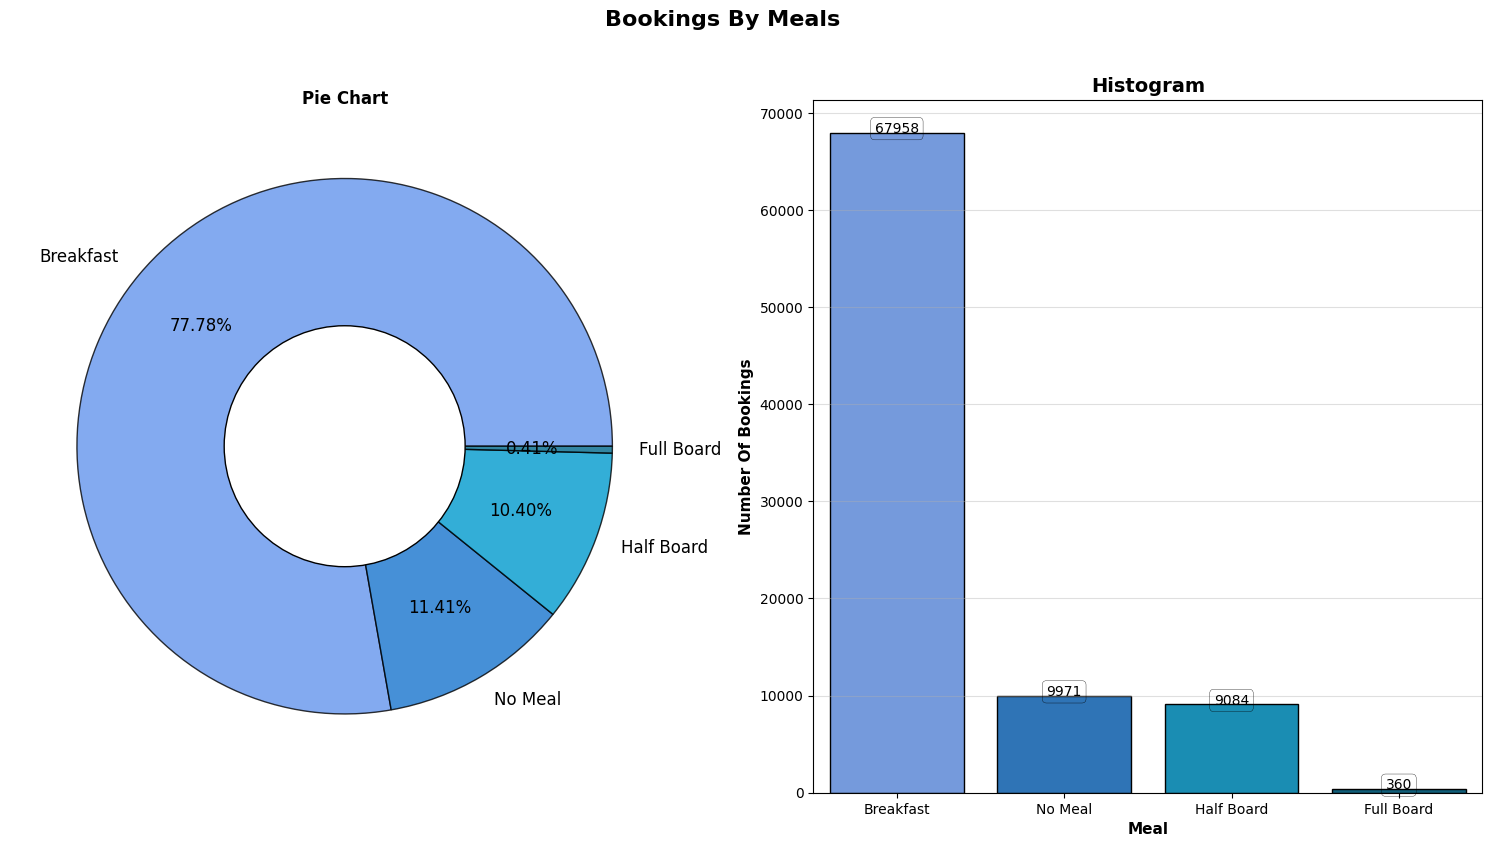

In [58]:
colors = ["#6495ED", "#1874CD", "#009ACD", "#00688B"]
labels = ["Breakfast", "No Meal", "Half Board", "Full Board"]
order = df['meal'].value_counts().index
plt.figure(figsize = (19, 9))
plt.suptitle('Bookings By Meals', fontweight = 'heavy', fontsize = '16',
            fontfamily = 'sans-serif', color = "black")
# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight = 'bold', fontfamily = "sans-serif", color = 'black')
plt.pie(df["meal"].value_counts(), pctdistance = 0.7, autopct = '%.2f%%', labels = labels, colors = colors,
wedgeprops = dict(alpha = 0.8, edgecolor = "black"), textprops = {'fontsize': 12})
centre = plt.Circle((0,0), 0.45, fc = "white", edgecolor = "black")
plt.gcf().gca().add_artist(centre)
# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title("Histogram", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "meal", data = df, order = order, edgecolor = "black", palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Meal", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df['meal'].value_counts()

### Bookings By Customer Type

Transient          71972
Transient-Party    11718
Contract            3139
Group                544
Name: customer_type, dtype: int64

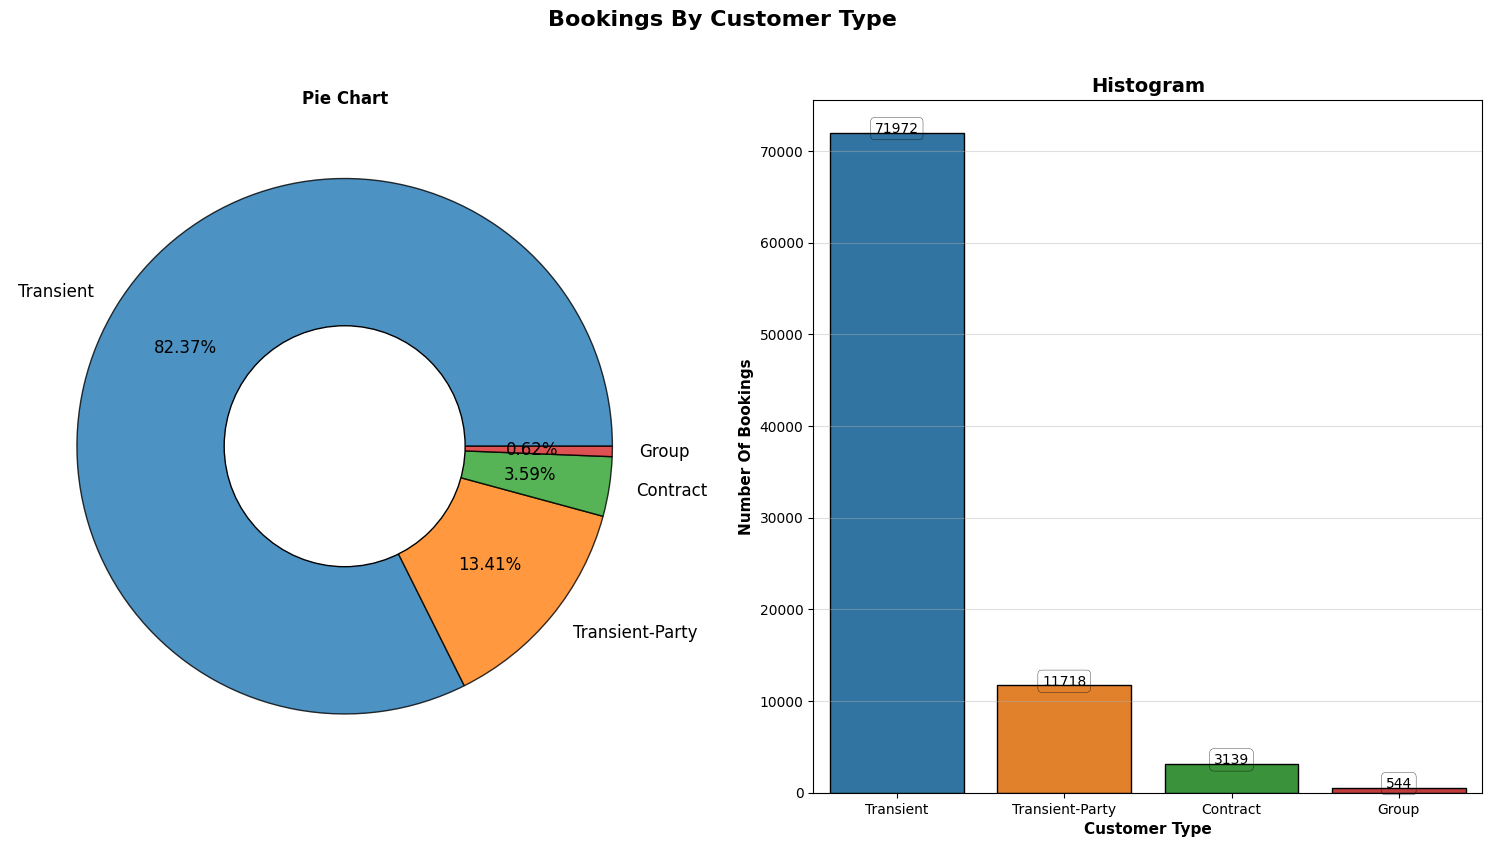

In [59]:
labels = ["Transient", "Transient-Party", "Contract", "Group"]
order = df['customer_type'].value_counts().index
plt.figure(figsize = (19, 9))
plt.suptitle('Bookings By Customer Type', fontweight = 'heavy', fontsize = '16',
            fontfamily = 'sans-serif', color = "black")
# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight = 'bold', fontfamily = "sans-serif", color = 'black')
plt.pie(df["customer_type"].value_counts(), pctdistance = 0.7, autopct = '%.2f%%', labels = labels,
wedgeprops = dict(alpha = 0.8, edgecolor = "black"), textprops = {'fontsize': 12})
centre = plt.Circle((0,0), 0.45, fc = "white", edgecolor = "black")
plt.gcf().gca().add_artist(centre)
# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title("Histogram", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "customer_type", data = df, order = order, edgecolor = "black")
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Customer Type", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df['customer_type'].value_counts()

### Bookings by Type Of Guest

0    83958
1     3415
Name: is_repeated_guest, dtype: int64

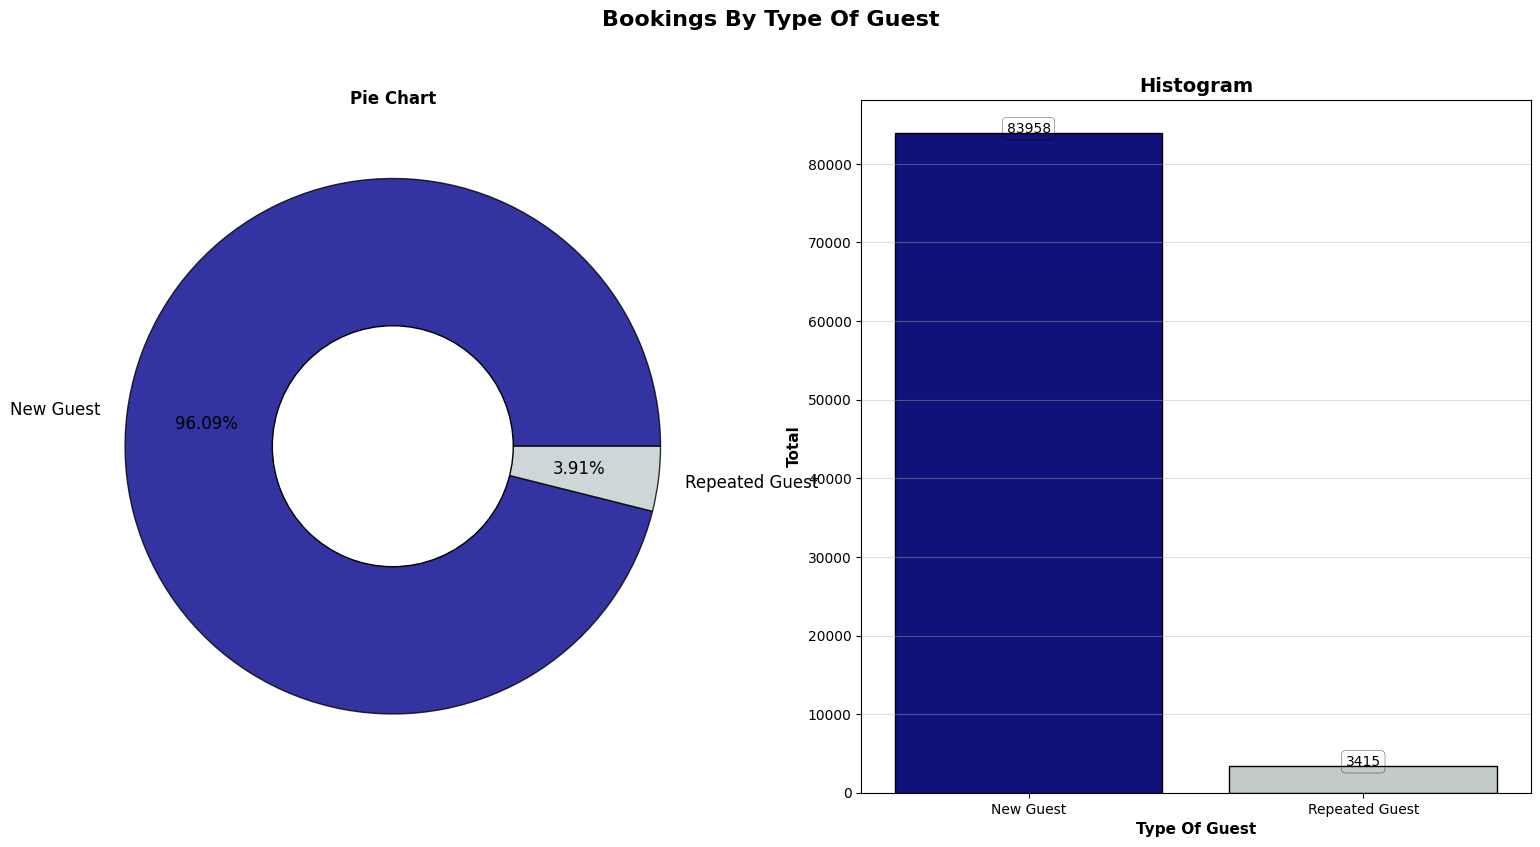

In [60]:
labels = ['New Guest', 'Repeated Guest']
colors = ["#00008B", "#C1CDCD"]
order = df['is_repeated_guest'].value_counts().index
plt.figure(figsize = (19, 9))
plt.suptitle('Bookings By Type Of Guest', fontweight = 'heavy', fontsize = '16',
            fontfamily = 'sans-serif', color = "black")
# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight = 'bold', fontfamily = "sans-serif", color = 'black')
plt.pie(df["is_repeated_guest"].value_counts(), pctdistance = 0.7, autopct = '%.2f%%', labels = labels,
wedgeprops = dict(alpha = 0.8, edgecolor = "black"), textprops = {'fontsize': 12}, colors = colors)
centre = plt.Circle((0,0), 0.45, fc = "white", edgecolor = "black")
plt.gcf().gca().add_artist(centre)
# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title("Histogram", fontweight = "bold", fontsize = 14, fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "is_repeated_guest", data = df, order = order, edgecolor = "black", palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Type Of Guest", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Total", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.xticks([0, 1], labels)
plt.grid(axis = "y", alpha = 0.4)

df['is_repeated_guest'].value_counts()

### Bookings By Deposit Type

No Deposit    86228
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

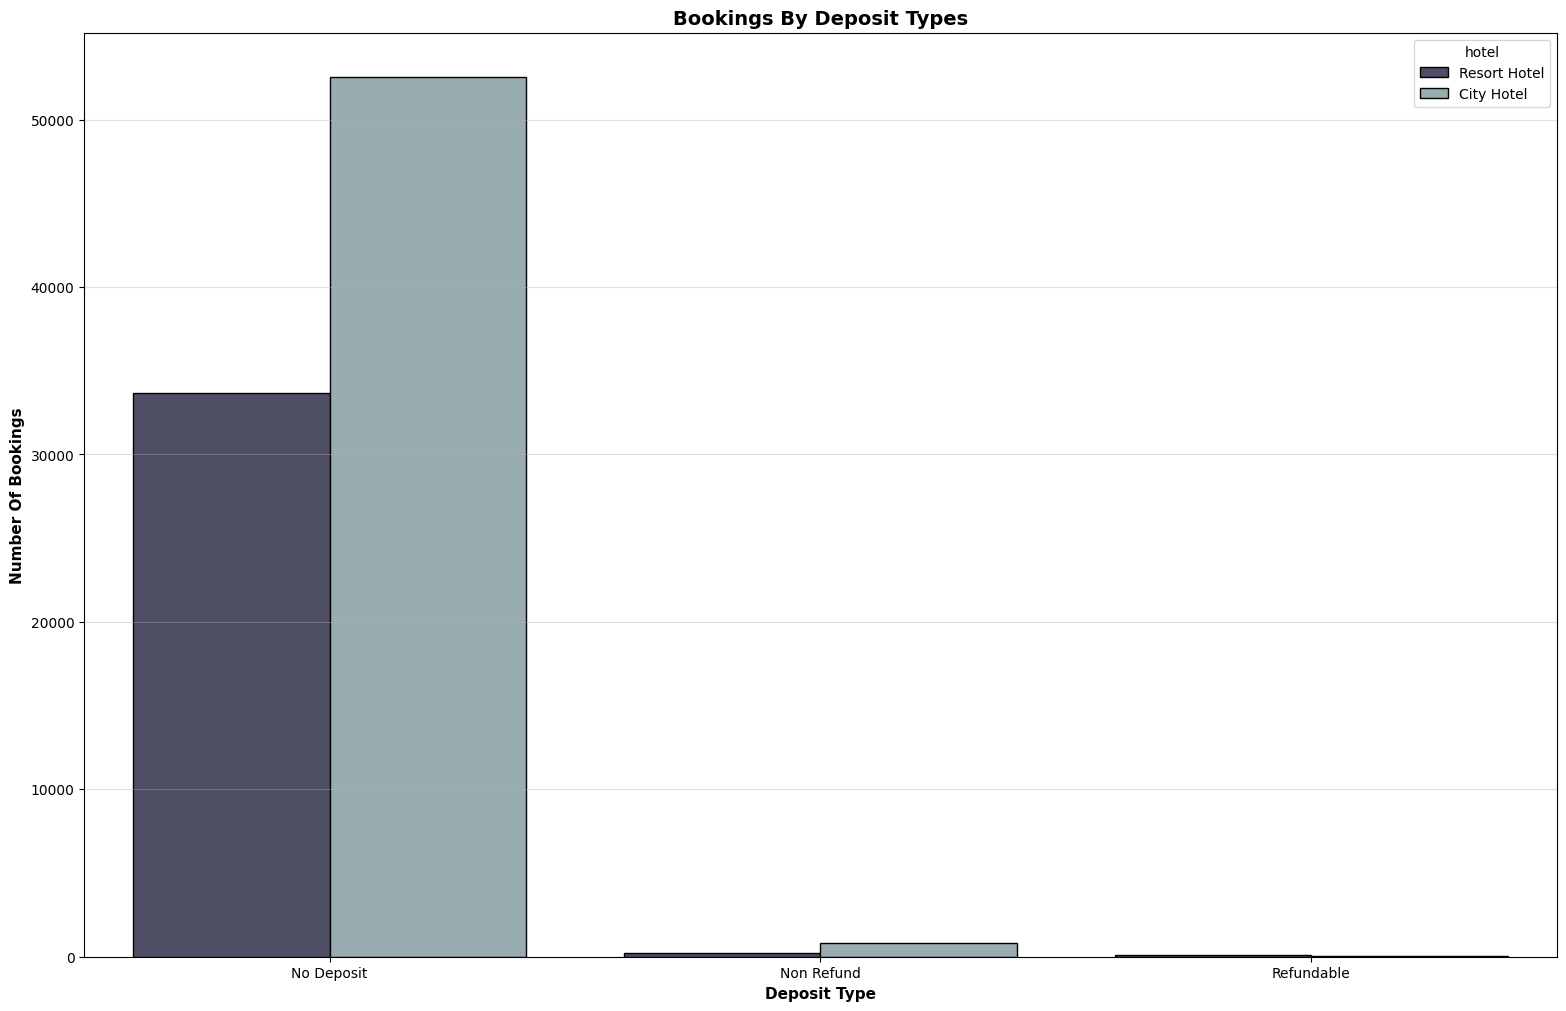

In [61]:
plt.figure(figsize = (19, 12))
order = sorted(df["deposit_type"].unique())
plt.title("Bookings By Deposit Types", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "deposit_type", data = df, hue = "hotel", edgecolor = "black", palette = "bone", order = order)
plt.xlabel("Deposit Type", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df["deposit_type"].value_counts()

### Bookings By Reserved Room Types

A    56536
D    17397
E     6048
F     2822
G     2052
B      995
C      915
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64

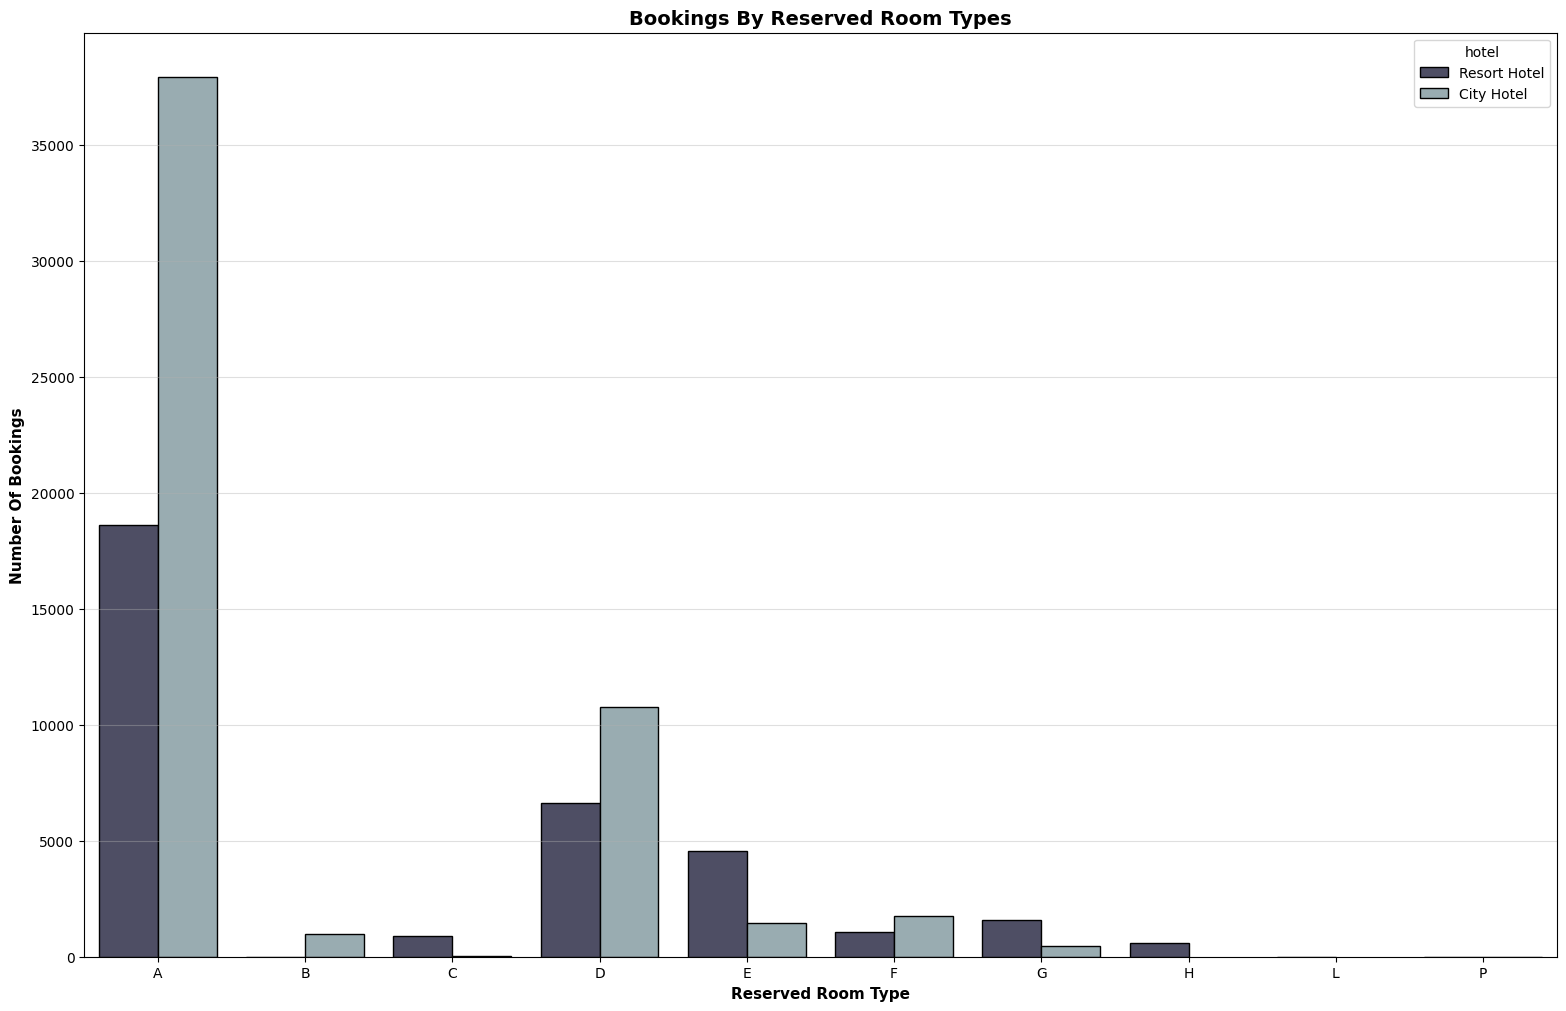

In [62]:
plt.figure(figsize = (19, 12))
order = sorted(df["reserved_room_type"].unique())
plt.title("Bookings By Reserved Room Types", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "reserved_room_type", data = df, hue = "hotel", edgecolor = "black", palette = "bone", order = order)
plt.xlabel("Reserved Room Type", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df["reserved_room_type"].value_counts()

### Bookings By Assigned Room Types

A    46305
D    22424
E     7193
F     3626
G     2498
C     2165
B     1816
H      706
I      357
K      276
P        6
L        1
Name: assigned_room_type, dtype: int64

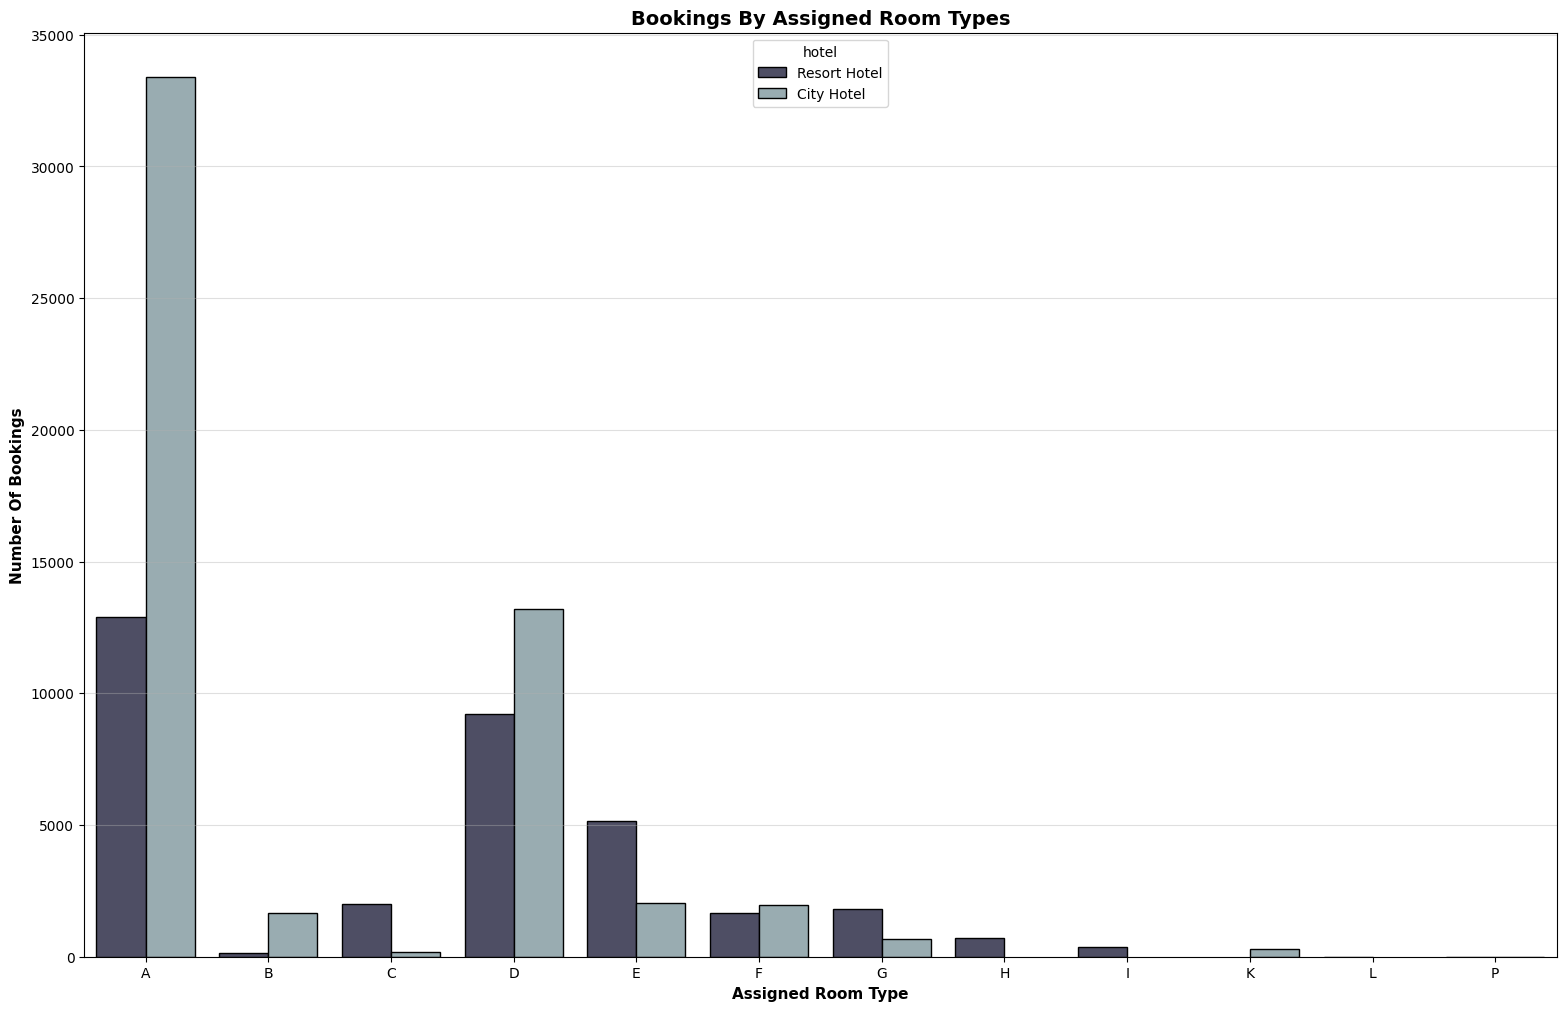

In [63]:
plt.figure(figsize = (19, 12))
order = sorted(df["assigned_room_type"].unique())
plt.title("Bookings By Assigned Room Types", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "assigned_room_type", data = df, hue = "hotel", edgecolor = "black", palette = "bone", order = order)
plt.xlabel("Assigned Room Type", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df["assigned_room_type"].value_counts()

### Bookings By Reservation Status

Check-Out    63353
Canceled     23006
No-Show       1014
Name: reservation_status, dtype: int64

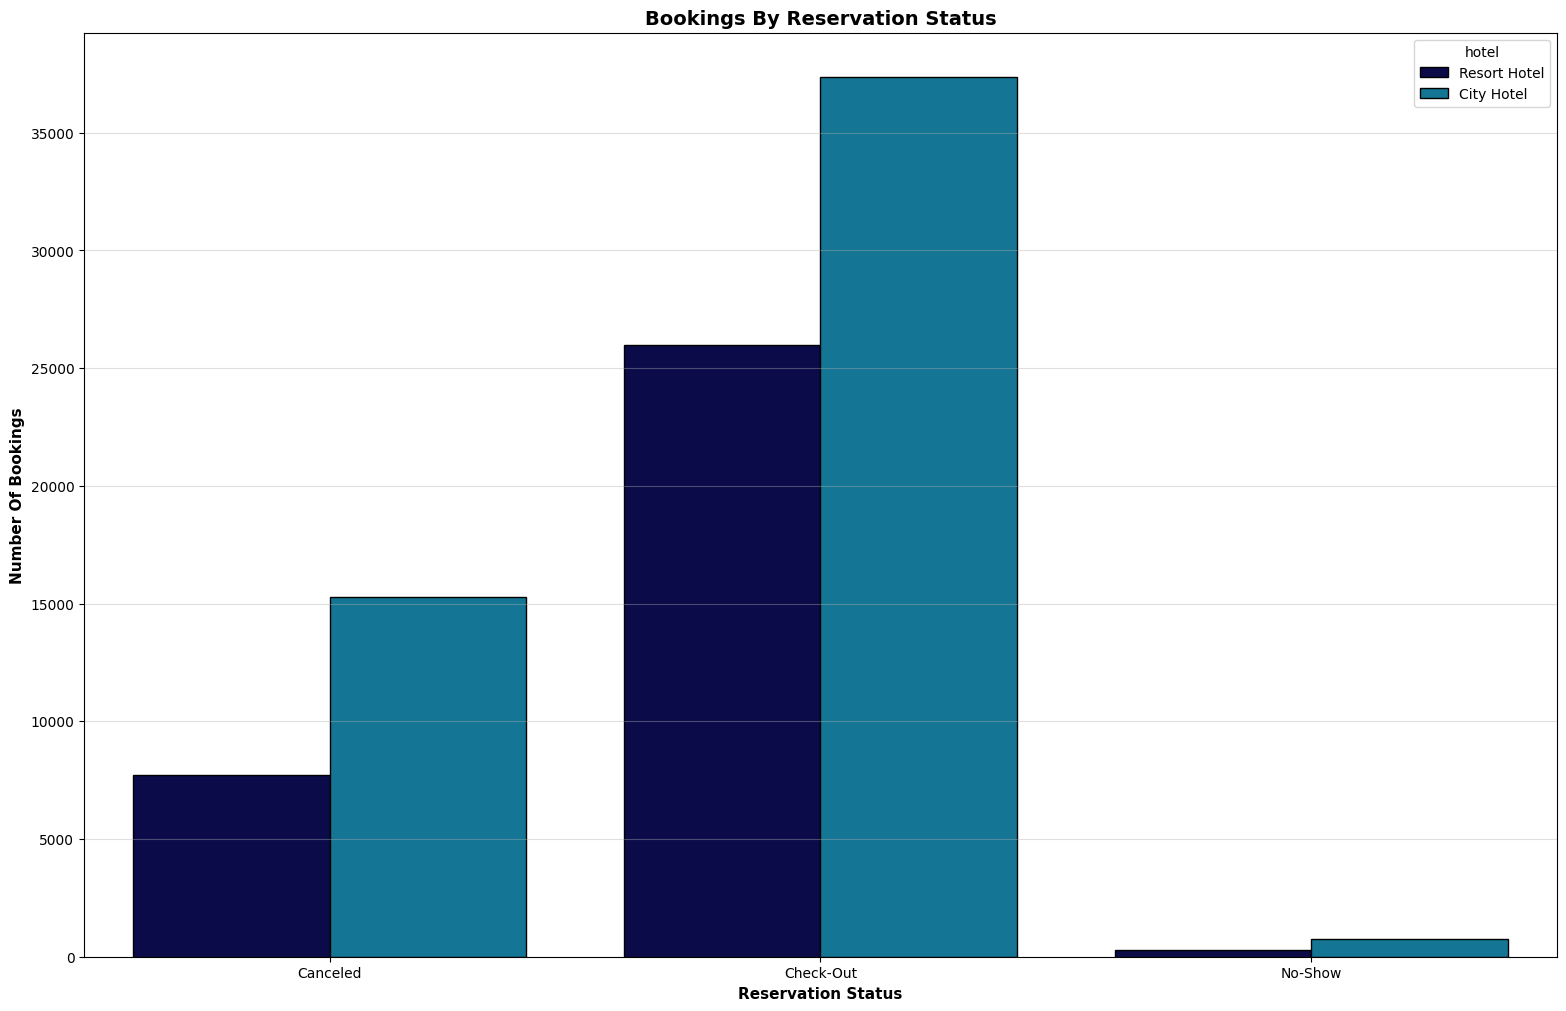

In [64]:
plt.figure(figsize = (19, 12))
order = sorted(df["reservation_status"].unique())
plt.title("Bookings By Reservation Status", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "reservation_status", data = df, hue = "hotel", edgecolor = "black", palette = "ocean", order = order)
plt.xlabel("Reservation Status", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df["reservation_status"].value_counts()

### Bookings By Stay Duration

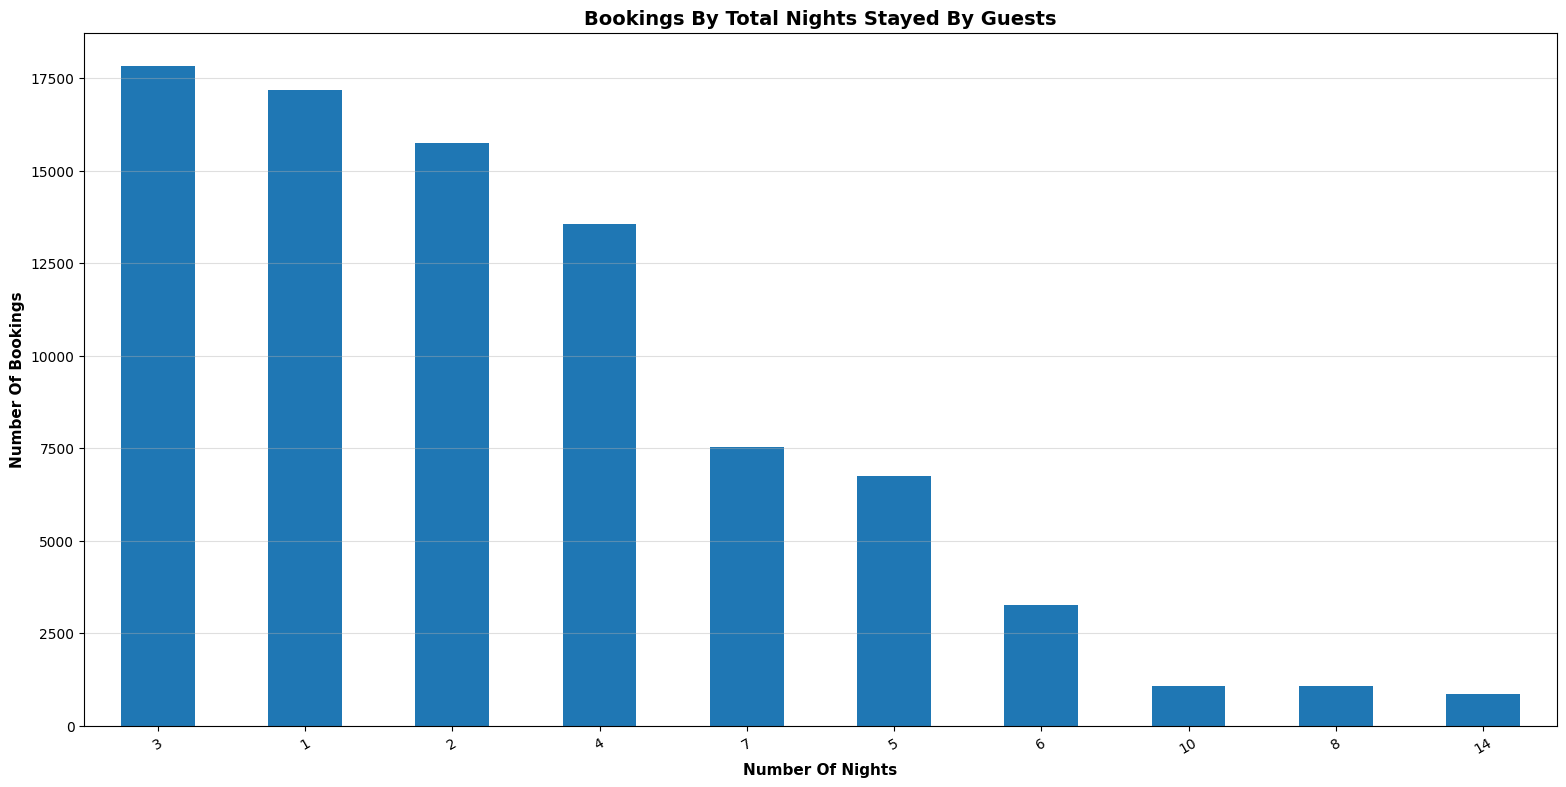

In [65]:
plt.figure(figsize = (19, 9))
df2 = df.groupby("total_nights")["total_nights"].count()
df2.sort_values(ascending = False)[: 10].plot(kind = 'bar')
plt.title("Bookings By Total Nights Stayed By Guests", fontweight = "bold", fontsize = 14, fontfamily = "sans-serif", 
color = 'black')
plt.xticks(rotation = 30)
plt.xlabel("Number Of Nights", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

### Total Nights Stayed By Guests In Hotel

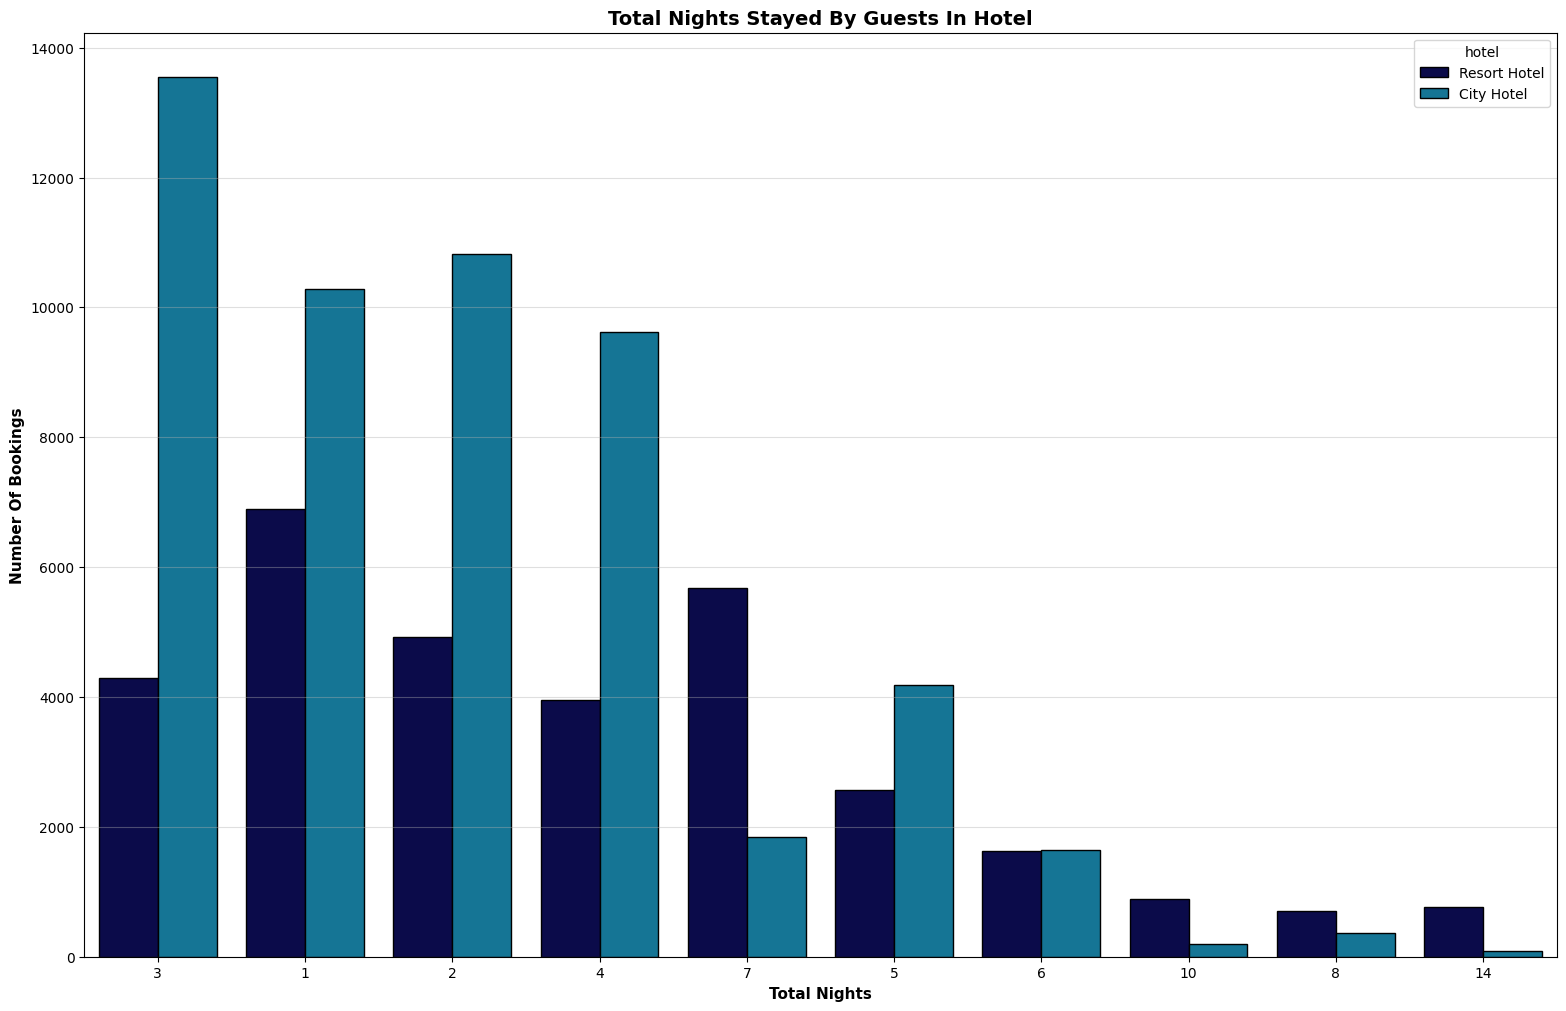

In [66]:
plt.figure(figsize = (19, 12))
order = df.total_nights.value_counts().iloc[:10].index
plt.title("Total Nights Stayed By Guests In Hotel", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "total_nights", data = df, hue = "hotel", edgecolor = "black", palette = "ocean", order = order)
plt.xlabel("Total Nights", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

### Bookings By Top 20 Countries

PRT    27882
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

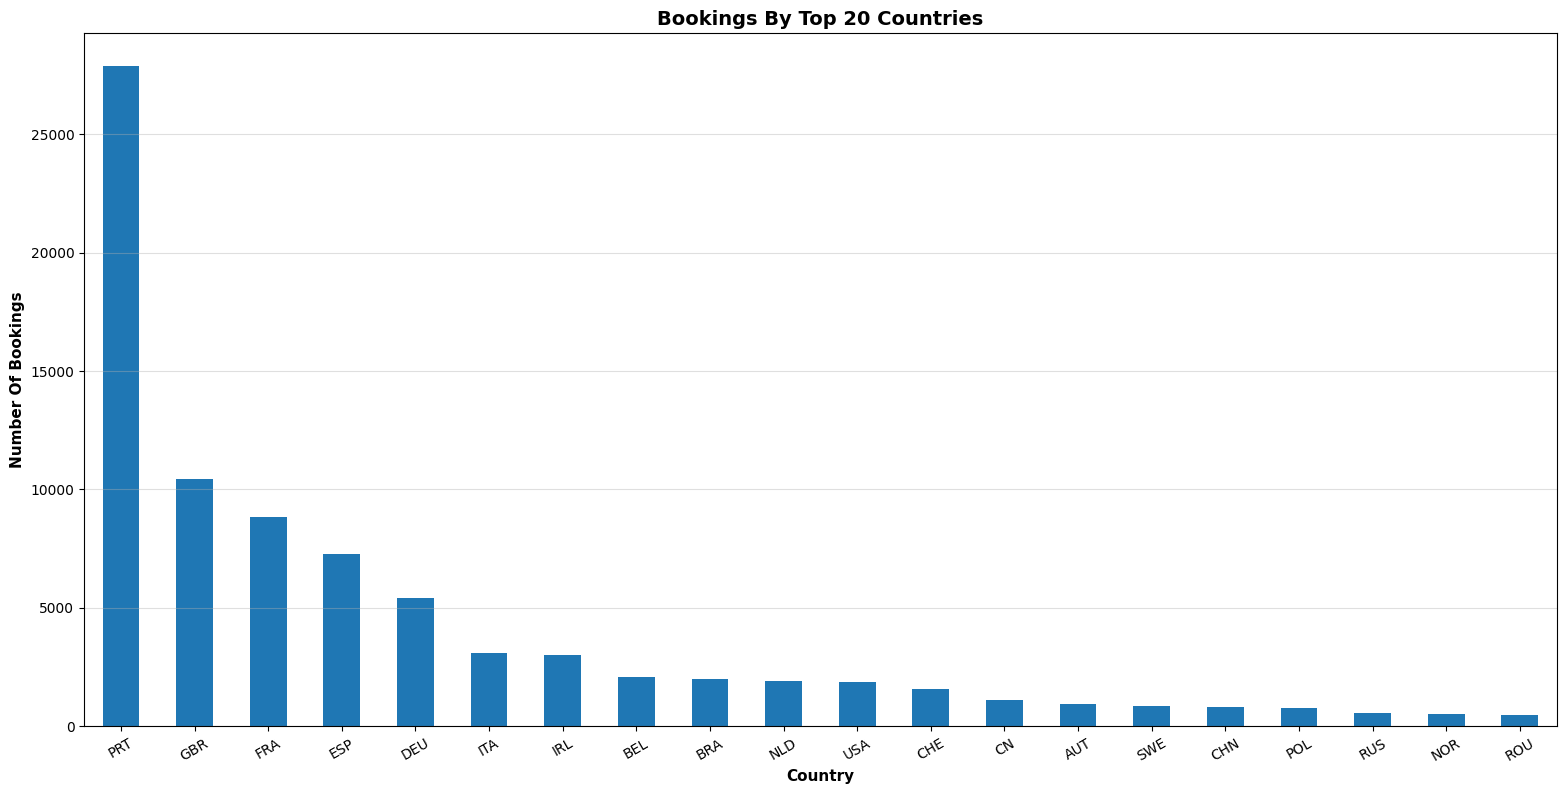

In [67]:
plt.figure(figsize = (19, 9))
df2 = df.groupby("country")["country"].count()
df2.sort_values(ascending = False)[: 20].plot(kind = 'bar')
plt.title("Bookings By Top 20 Countries", fontweight = "bold", fontsize = 14, fontfamily = "sans-serif", color = 'black')
plt.xticks(rotation = 30)
plt.xlabel("Country", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df["country"].value_counts()

### Bookings by Lead time

count    87373.000000
mean        79.909377
std         86.055917
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64

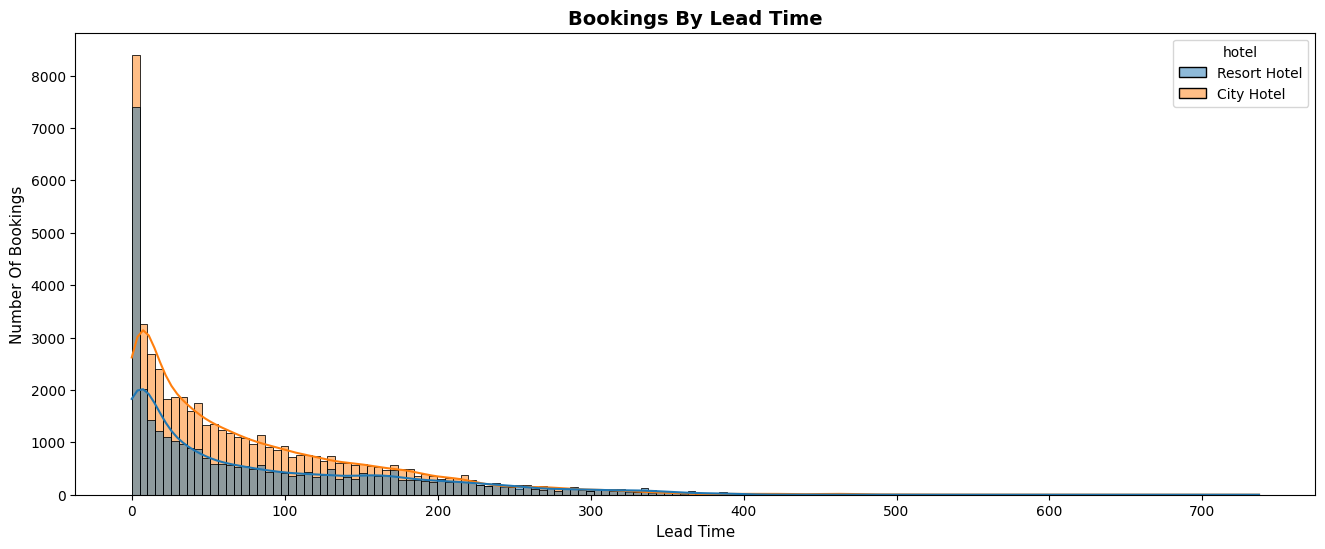

In [68]:
plt.figure(figsize = (16, 6))
plt.title("Bookings By Lead Time", fontweight = "bold", fontsize = 14, fontfamily = 'sans-serif', color = 'black')
sns.histplot(data = df, x = 'lead_time', hue = "hotel", kde = True, color = "#104E8B")
plt.xlabel('Lead Time', fontweight = 'normal', fontsize = 11, fontfamily = 'sans-serif', color = "black")
plt.ylabel('Number Of Bookings', fontweight = 'regular', fontsize = 11, fontfamily = "sans-serif", color = "black")

df["lead_time"].describe().T

## Relationships

### Number Of Bookings Cancelled By Guests

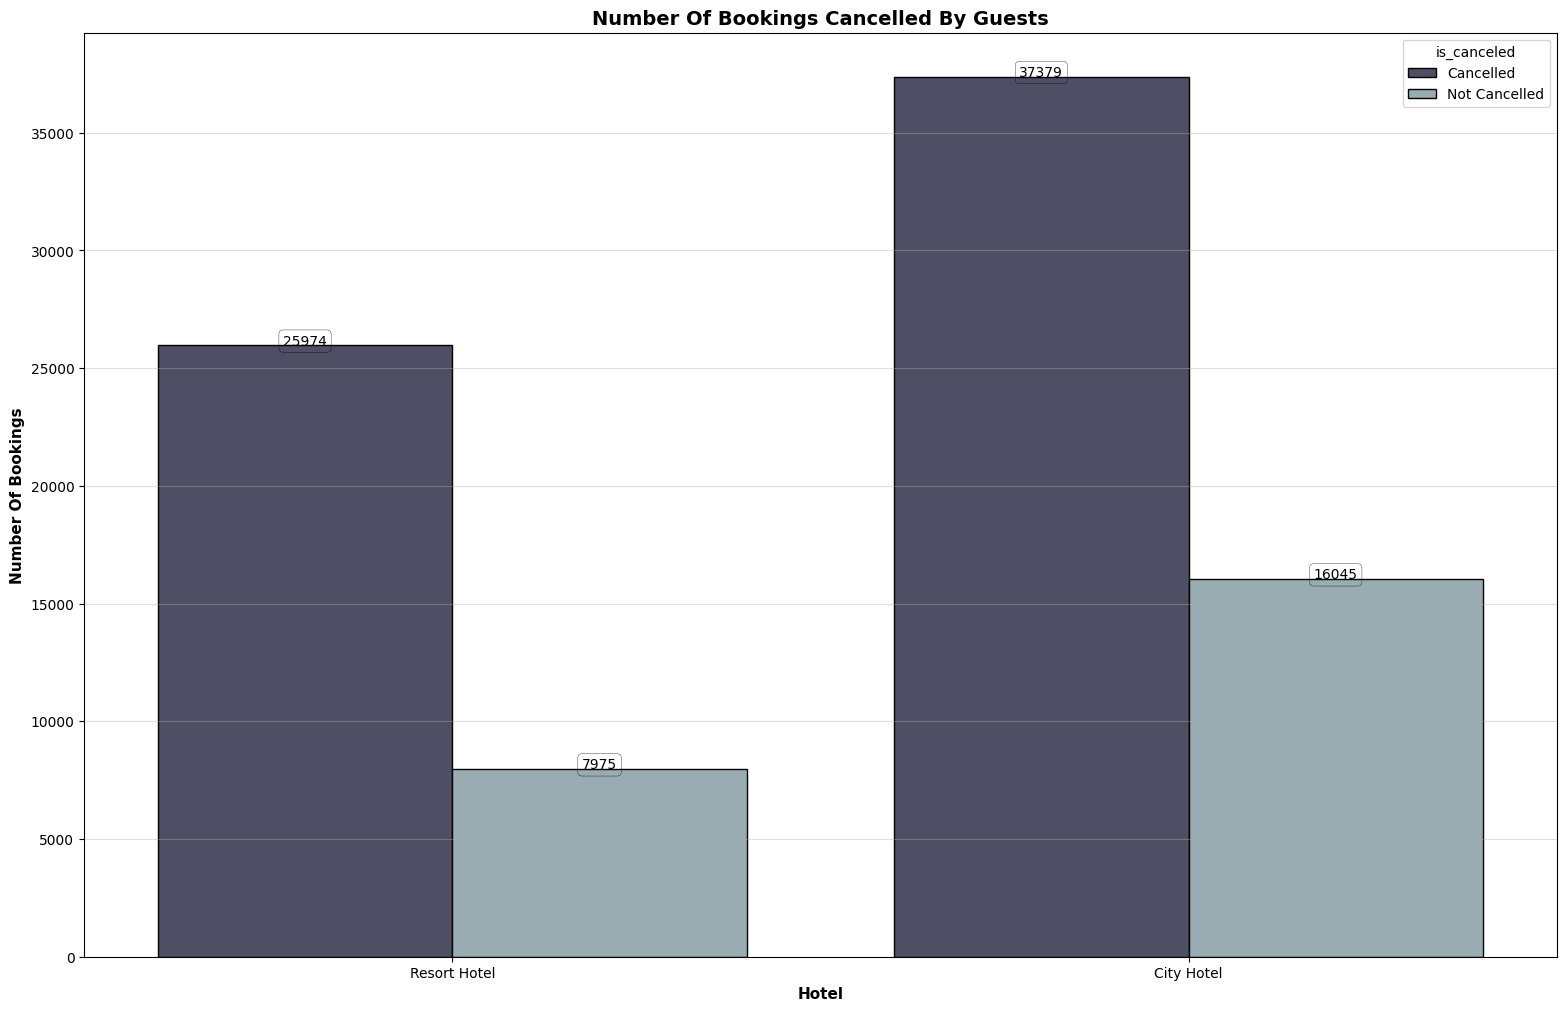

In [69]:
plt.figure(figsize = (19, 12))
plt.title("Number Of Bookings Cancelled By Guests", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "hotel", data = df, hue = "is_canceled", edgecolor = "black", palette = "bone")
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Hotel", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

### Cancellation By Type Of Guests

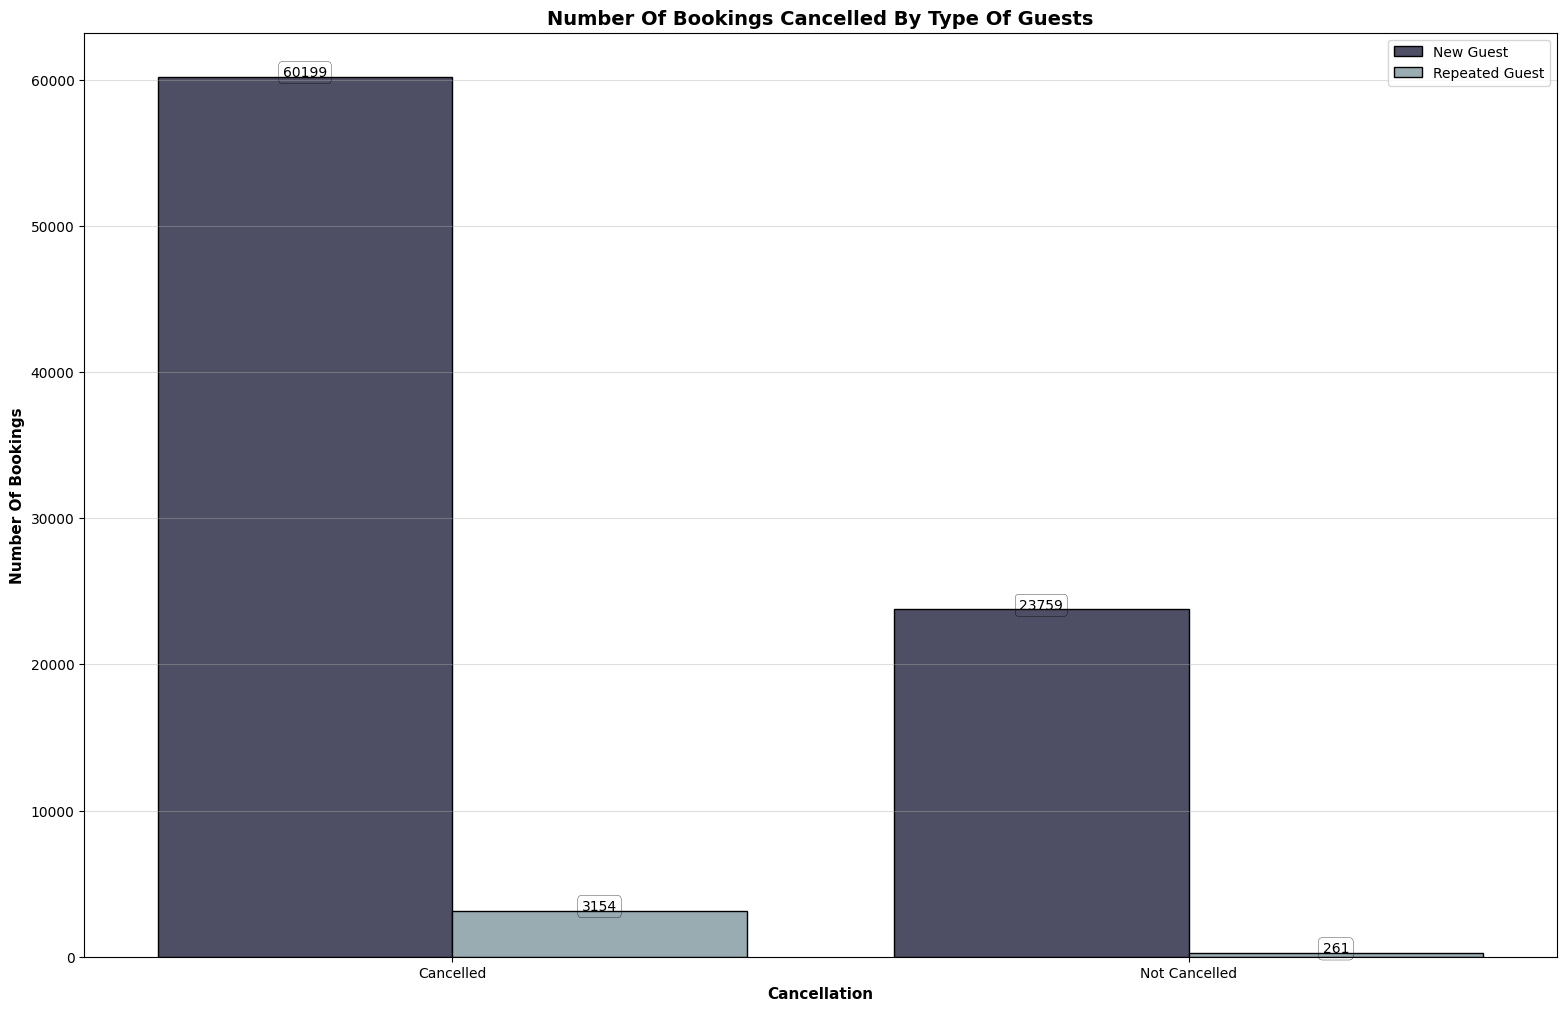

In [70]:
plt.figure(figsize = (19, 12))
plt.title("Number Of Bookings Cancelled By Type Of Guests", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "is_canceled", data = df, hue = "is_repeated_guest", edgecolor = "black", palette = "bone")
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Cancellation", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.legend(['New Guest', 'Repeated Guest'])
plt.grid(axis = "y", alpha = 0.4)

### Cancellations By Market Segments

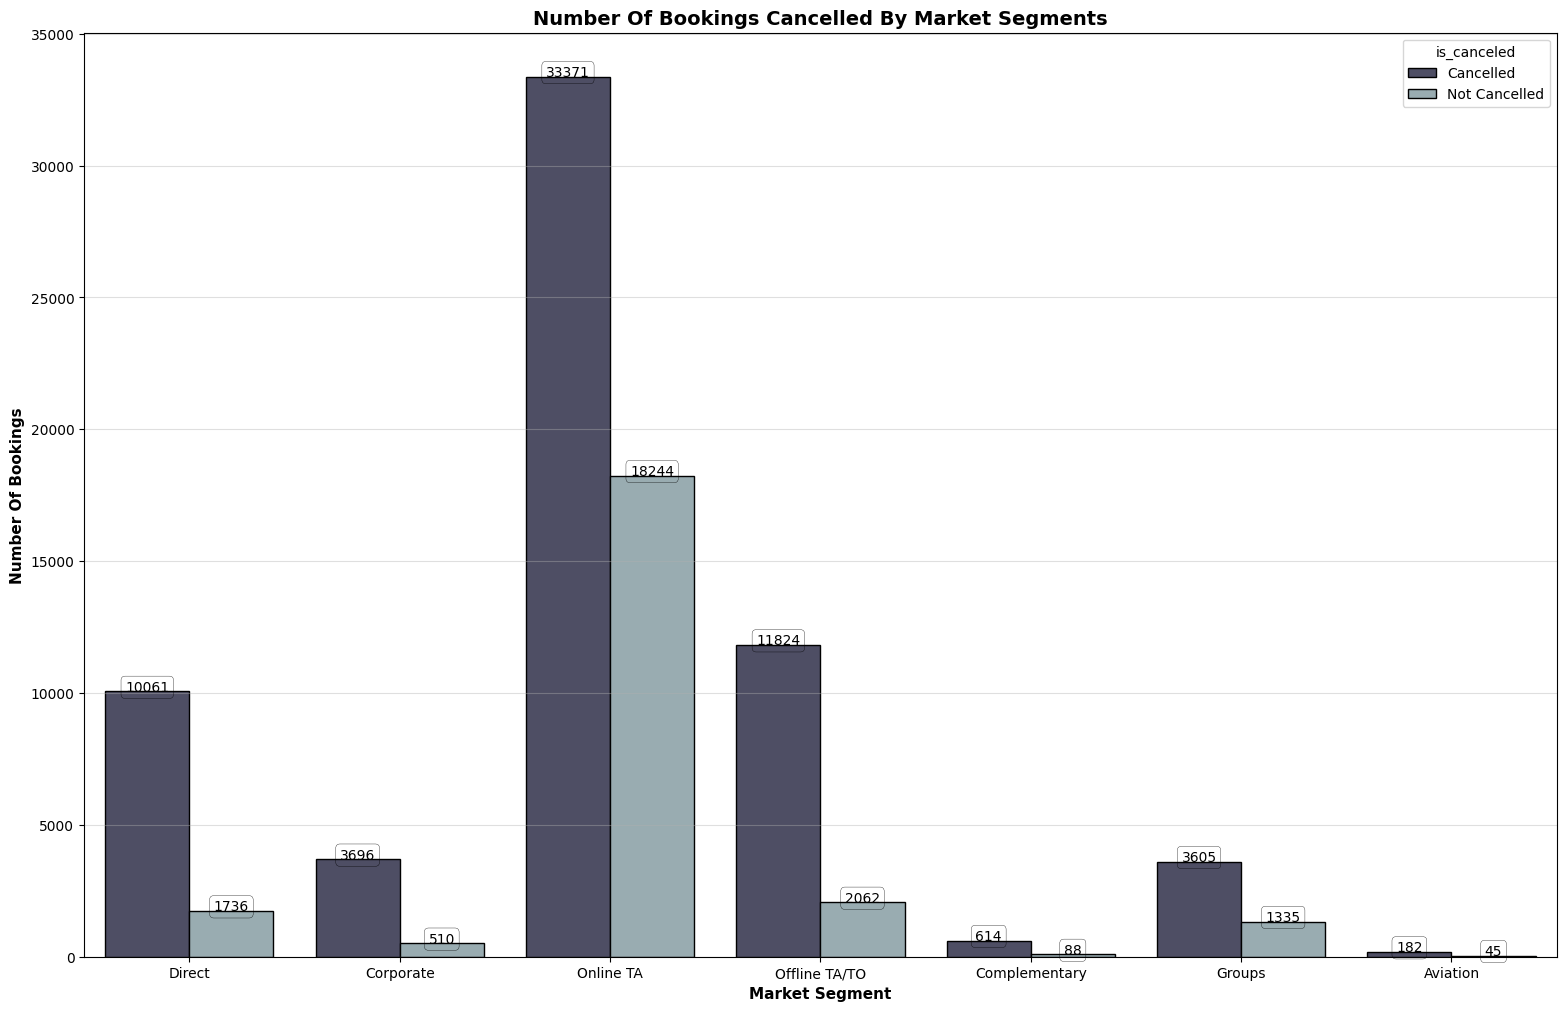

In [71]:
plt.figure(figsize = (19, 12))
plt.title("Number Of Bookings Cancelled By Market Segments", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "market_segment", data = df, hue = "is_canceled", edgecolor = "black", palette = "bone")
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Market Segment", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

### Number Of Bookings Per Year 

2016    42380
2017    31685
2015    13308
Name: arrival_date_year, dtype: int64

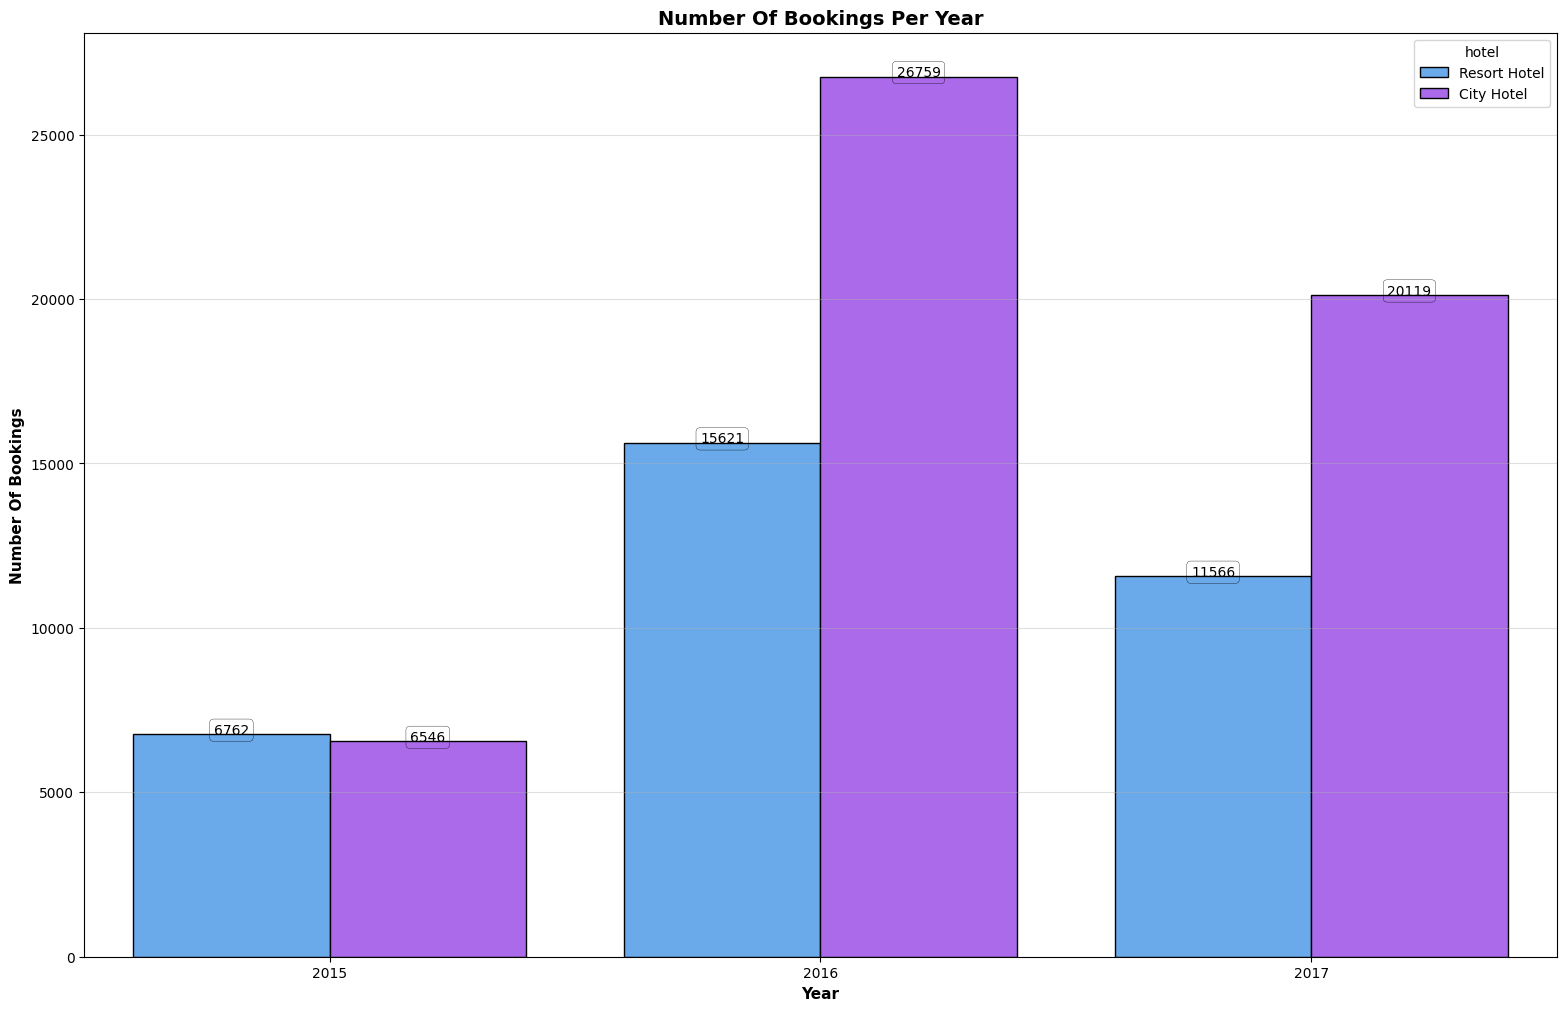

In [72]:
plt.figure(figsize = (19, 12))
plt.title("Number Of Bookings Per Year", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "arrival_date_year", data = df, hue = "hotel", edgecolor = "black", palette = "cool")
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Year", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df["arrival_date_year"].value_counts()

### Number Of Bookings Per Customer Type

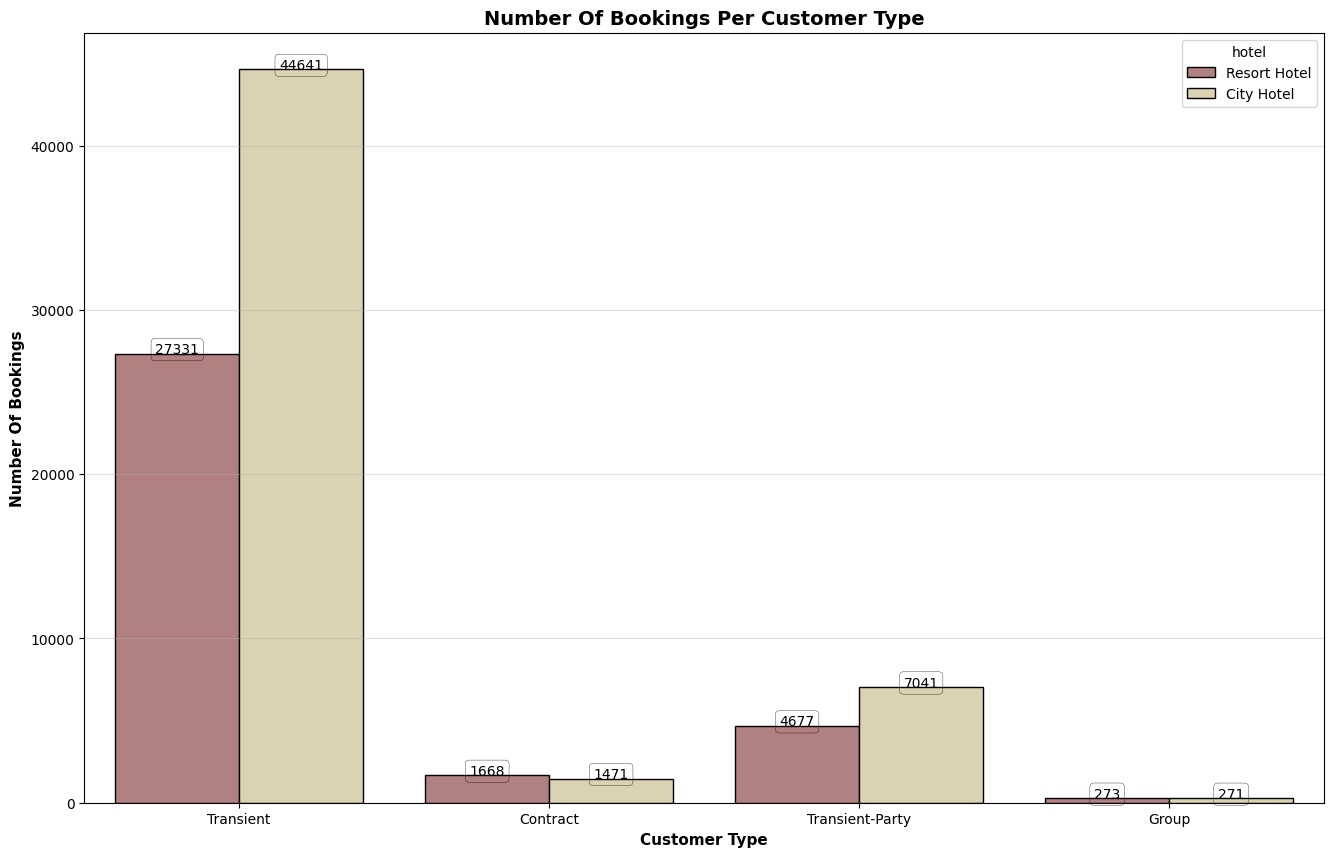

In [73]:
plt.figure(figsize = (16, 10))
plt.title("Number Of Bookings Per Customer Type", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "customer_type", data = df, hue = "hotel", edgecolor = "black", palette = "pink")
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Customer Type", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)



### Number Of Bookings Per Month

August       11253
July         10056
May           8355
April         7905
June          7765
March         7510
October       6932
September     6690
February      6092
December      5129
November      4995
January       4691
Name: arrival_date_month, dtype: int64

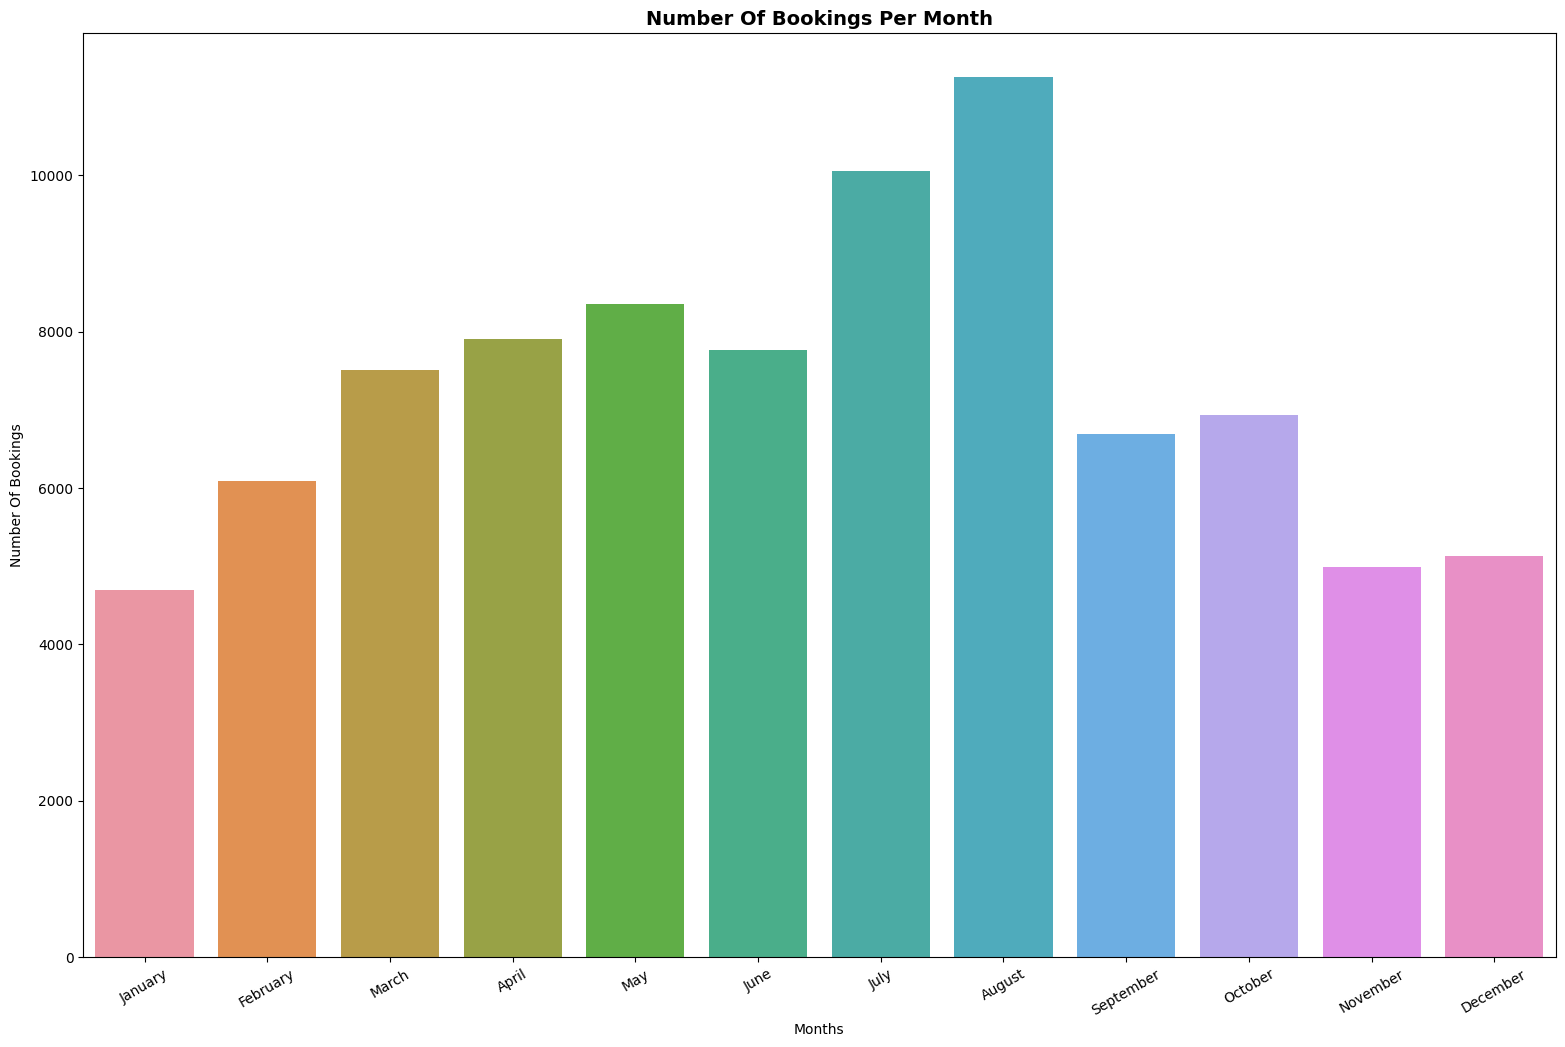

In [74]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October",
"November", "December"]

plt.figure(figsize = (19, 12))
plt.title("Number Of Bookings Per Month", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
d = df.groupby("arrival_date_month")["arrival_date_month"].count()
sns.barplot(x = d.index, y = d, order = months)
plt.xticks(rotation = 30)
plt.xlabel("Months")
plt.ylabel("Number Of Bookings")

df["arrival_date_month"].value_counts()

### Bookings Per Required Car Parking Space

0    80060
1     7280
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

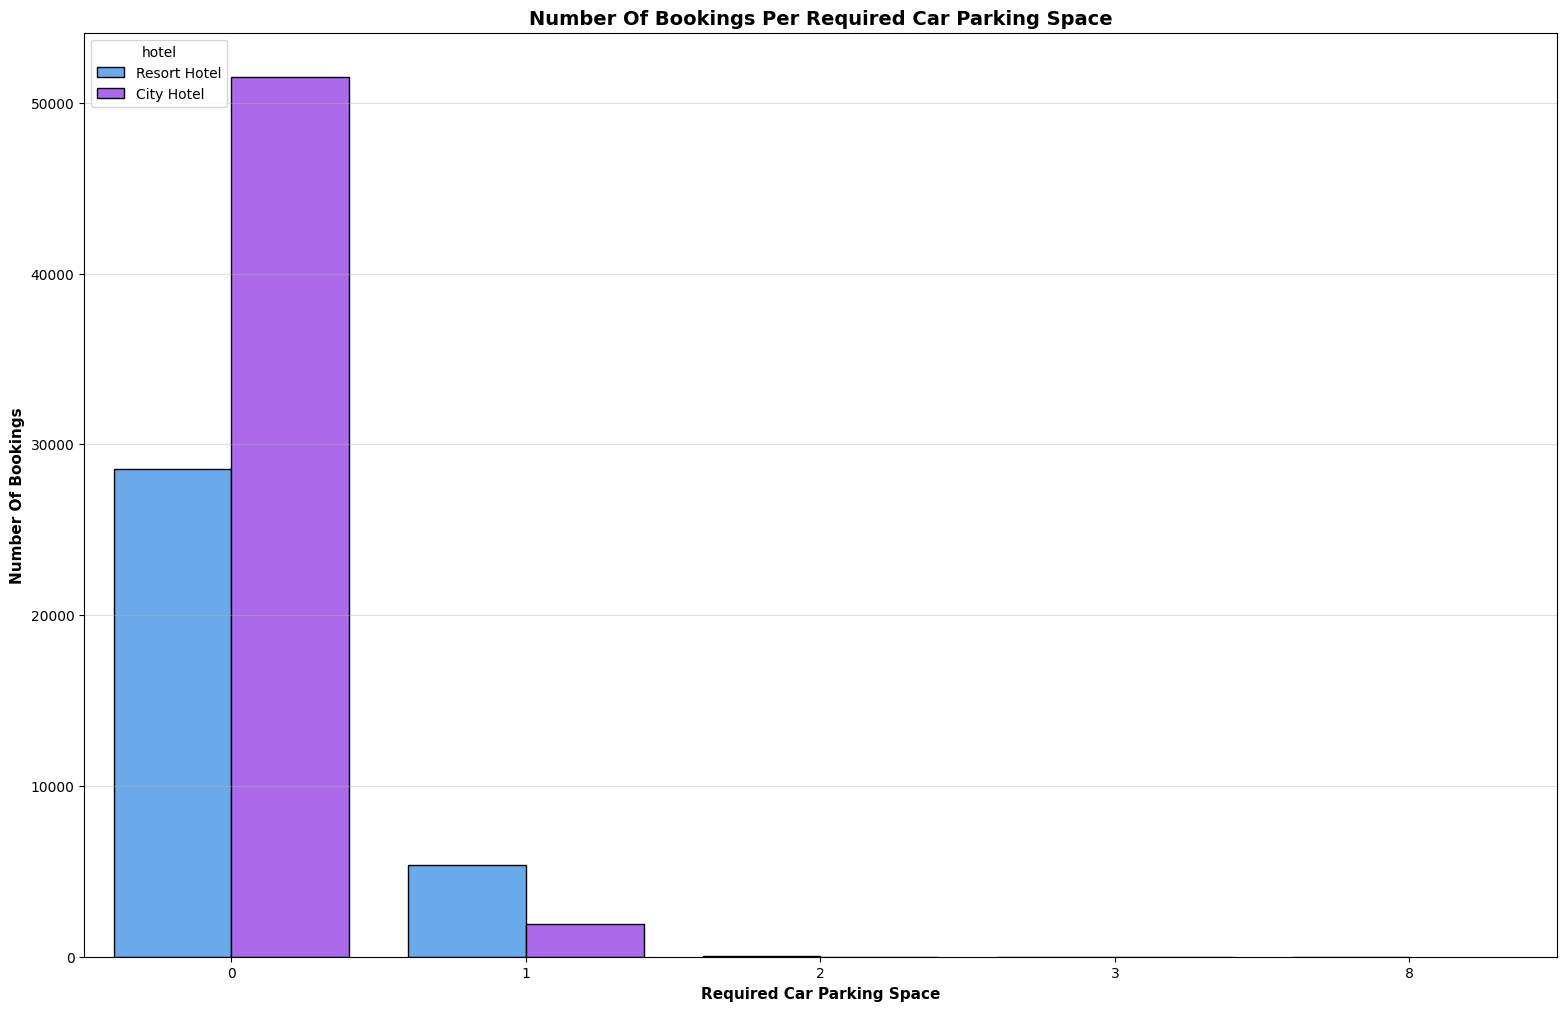

In [75]:
plt.figure(figsize = (19, 12))
plt.title("Number Of Bookings Per Required Car Parking Space", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "required_car_parking_spaces", data = df, hue = "hotel", edgecolor = "black", palette = "cool")
plt.xlabel("Required Car Parking Space", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Number Of Bookings", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.grid(axis = "y", alpha = 0.4)

df["required_car_parking_spaces"].value_counts()

### Average Number Of Special Requests Made By Top 20 Countries

Text(0.5, 1.0, 'Average Number Of Special Requests Made By Top 20 Countries ')

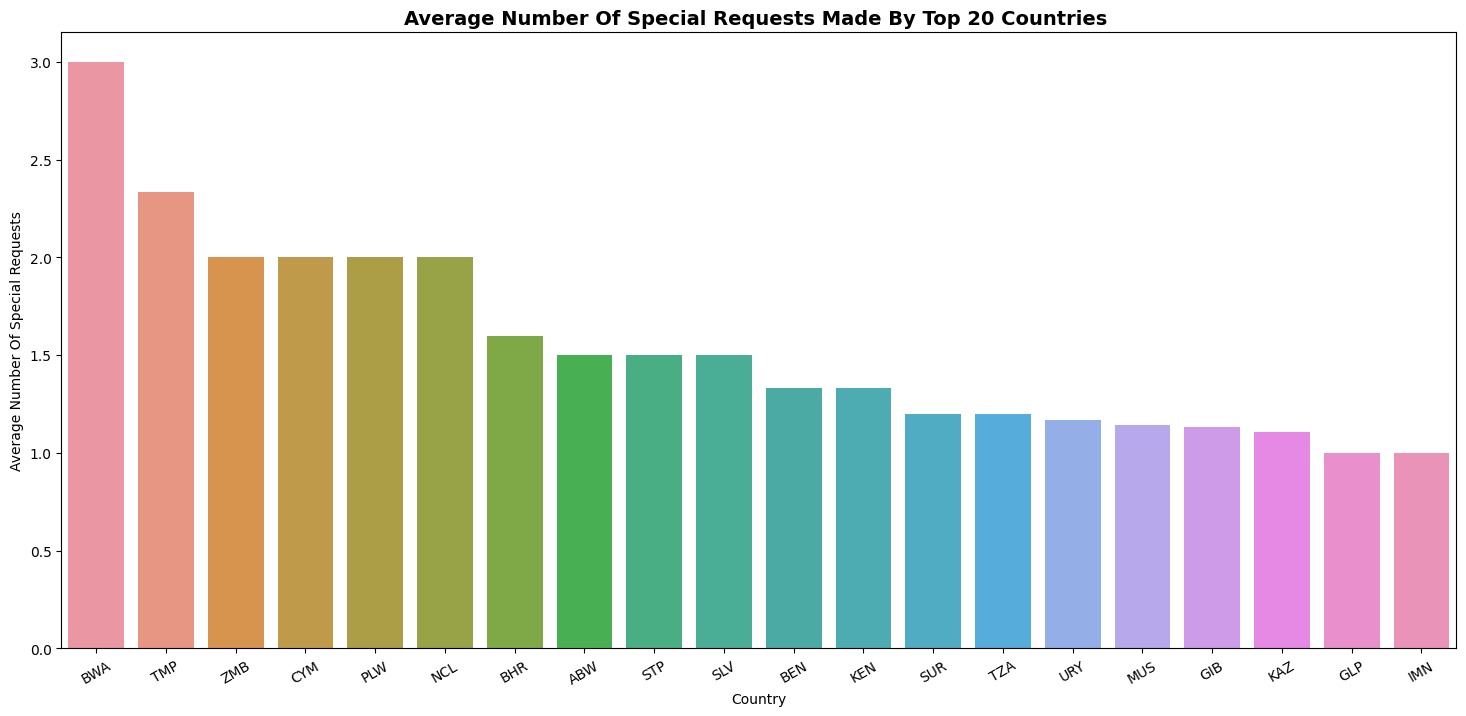

In [76]:
df2 = df.groupby("country")["total_of_special_requests"].mean().sort_values(ascending = False)[: 20]
plt.figure(figsize = (18, 8))
sns.barplot(x = df2.index, y = df2)
plt.xticks(rotation = 30)
plt.xlabel("Country")
plt.ylabel("Average Number Of Special Requests")
plt.title("Average Number Of Special Requests Made By Top 20 Countries ", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')


### Average Number Of Special Requests By Customer Type

Text(0.5, 1.0, 'Average Number Of Special Requests By Customer Type')

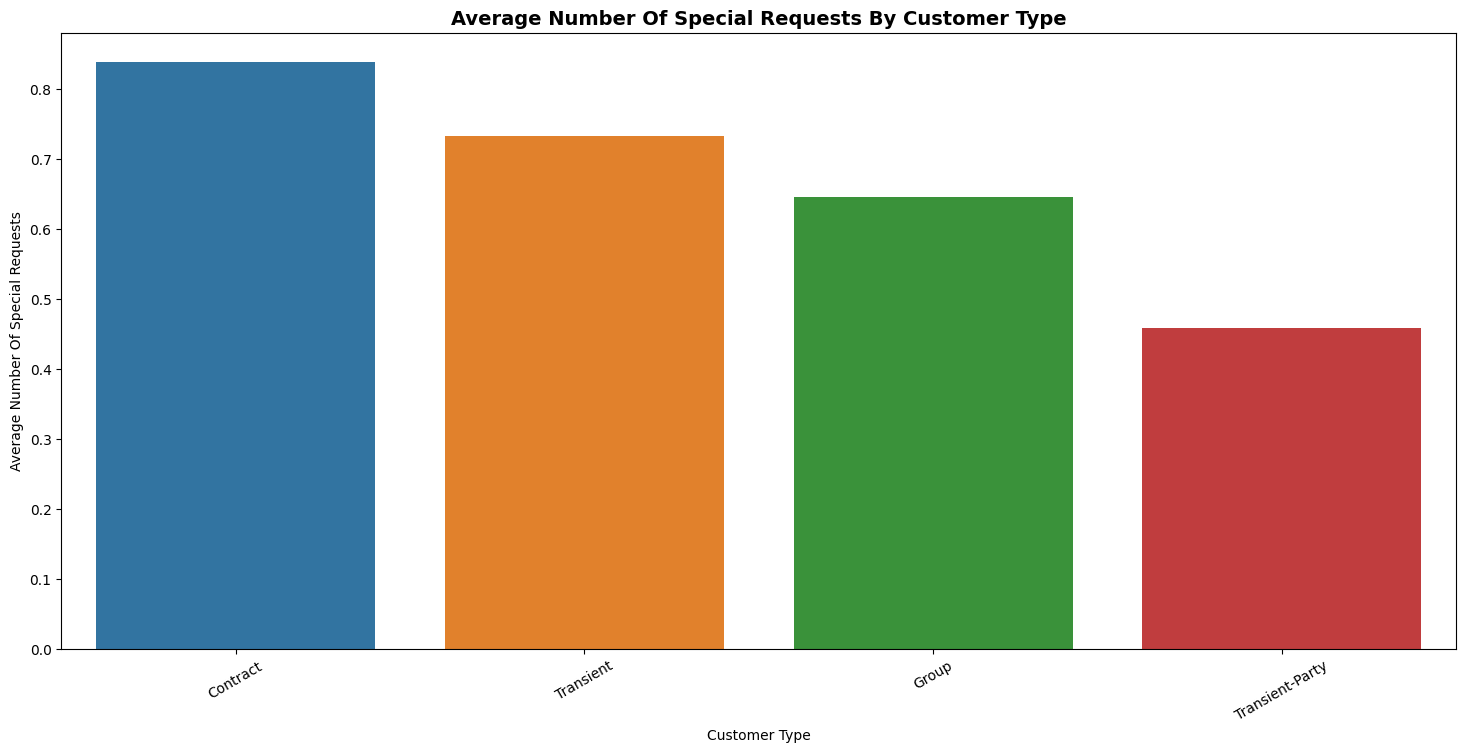

In [77]:
df2 = df.groupby("customer_type")["total_of_special_requests"].mean().sort_values(ascending = False)[: 20]
plt.figure(figsize = (18, 8))
sns.barplot(x = df2.index, y = df2)
plt.xticks(rotation = 30)
plt.xlabel("Customer Type")
plt.ylabel("Average Number Of Special Requests")
plt.title("Average Number Of Special Requests By Customer Type", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')


### Average Number Of Special Requests Made By Guests Per months

Text(0.5, 1.0, 'Average Number Of Special Requests By Guests Per Months ')

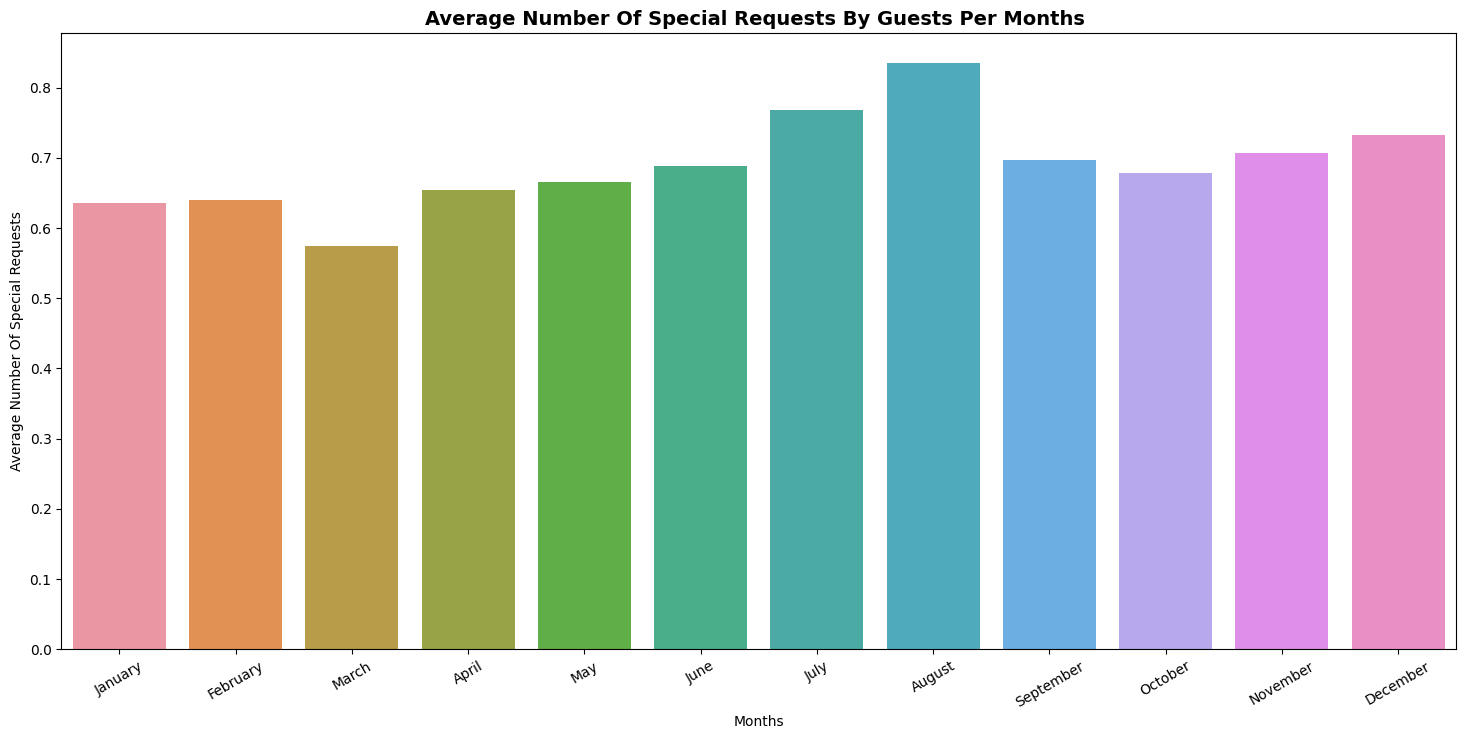

In [78]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October",
"November", "December"]

df2 = df.groupby("arrival_date_month")["total_of_special_requests"].mean().sort_values(ascending = False)[: 20]
plt.figure(figsize = (18, 8))
sns.barplot(x = df2.index, y = df2, order = months)
plt.xticks(rotation = 30)
plt.xlabel("Months")
plt.ylabel("Average Number Of Special Requests")
plt.title("Average Number Of Special Requests By Guests Per Months ", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')


### Average Daily Rate Per Hotel

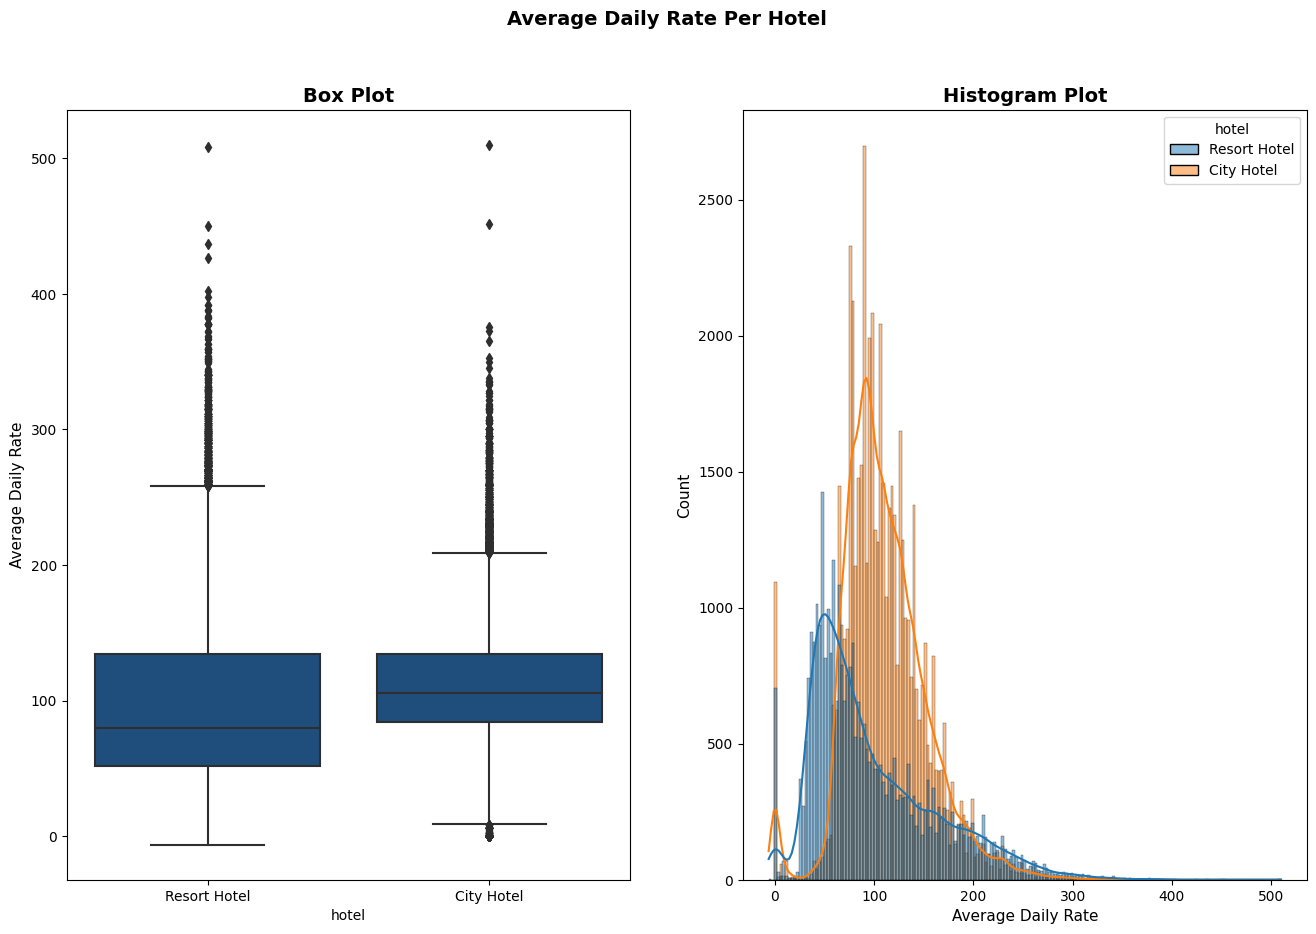

count    87372.000000
mean       106.288035
std         52.006694
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max        510.000000
Name: adr, dtype: float64

In [79]:
# Histogram
fig = plt.figure(figsize = (16, 10))
df.drop(df[df["adr"] == 5400].index, axis = 0, inplace = True)
plt.suptitle("Average Daily Rate Per Hotel", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')

plot1 = fig.add_subplot(1, 2, 2)
plt.title("Histogram Plot", fontweight = "bold", fontsize = 14, fontfamily = 'sans-serif', color = 'black')
sns.histplot(data = df, x = 'adr', hue = "hotel", kde = True, color = "#104E8B")
plt.xlabel('Average Daily Rate', fontweight = 'normal', fontsize = 11, fontfamily = 'sans-serif', color = "black")
plt.ylabel('Count', fontweight = 'regular', fontsize = 11, fontfamily = "sans-serif", color = "black")
# Box Plot
plot2 = fig.add_subplot(1, 2, 1)
plt.title("Box Plot", fontweight = "bold", fontsize = 14, fontfamily = 'sans-serif', color = 'black')
sns.boxplot(data = df, x = "hotel", y = 'adr', color = "#104E8B")
plt.ylabel('Average Daily Rate', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = "black")
plt.show()

df["adr"].describe()

### Average Daily Rate Per Month

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

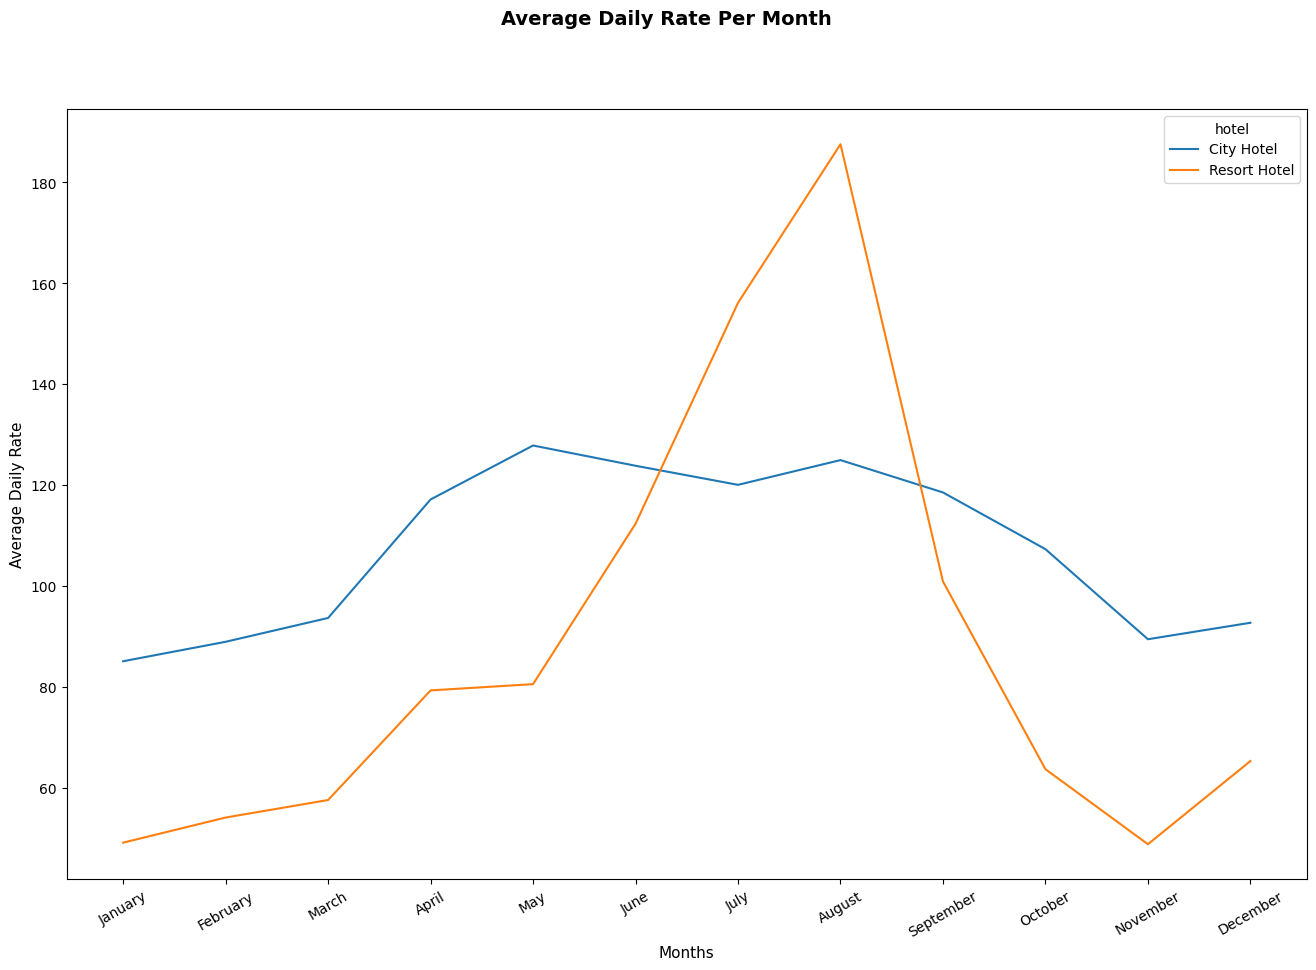

In [80]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October",
"November", "December"]

df.drop(df[df["adr"] == 5400].index, axis = 0, inplace = True)
d = df.groupby(["hotel", "arrival_date_month"])["adr"].mean().reset_index()
d["arrival_date_month"] = pd.Categorical(d["arrival_date_month"], categories = months, ordered = True)
d.sort_values("arrival_date_month", inplace = True)

fig = plt.figure(figsize = (16, 10))
plt.suptitle("Average Daily Rate Per Month", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
sns.lineplot(data = d, y = 'adr', x = "arrival_date_month", hue = "hotel")
plt.ylabel('Average Daily Rate', fontweight = 'normal', fontsize = 11, fontfamily = 'sans-serif', color = "black")
plt.xlabel('Months', fontweight = 'regular', fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.xticks(rotation = 30)

## Drop Some Features

In [81]:
df_sub = df.drop(['arrival_date_week_number', 'arrival_date_day_of_month', 'previous_cancellations',
'previous_bookings_not_canceled', 'booking_changes', 'reservation_status_date', 'agent', 'company', 'days_in_waiting_list', 
'adults', 'babies', 'children'], axis = 1)

## Correlation

### Correlation Matrix

In [82]:
corr_matrix = round(df_sub.corr(), 3)
"Correlation Matrix: "
corr_matrix


,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,adr,required_car_parking_spaces,total_of_special_requests,total_nights
lead_time,1.000,0.139,0.235,0.310,-0.147,0.025,-0.087,0.034,0.318
arrival_date_year,0.139,1.000,0.005,0.004,0.024,0.187,-0.040,0.064,0.005
stays_in_weekend_nights,0.235,0.005,1.000,0.556,-0.107,0.042,-0.043,0.032,0.786
stays_in_week_nights,0.310,0.004,0.556,1.000,-0.114,0.057,-0.044,0.038,0.951
is_repeated_guest,-0.147,0.024,-0.107,-0.114,1.000,-0.162,0.072,-0.001,-0.124
adr,0.025,0.187,0.042,0.057,-0.162,1.000,0.042,0.147,0.058
required_car_parking_spaces,-0.087,-0.040,-0.043,-0.044,0.072,0.042,1.000,0.048,-0.049
total_of_special_requests,0.034,0.064,0.032,0.038,-0.001,0.147,0.048,1.000,0.040
total_nights,0.318,0.005,0.786,0.951,-0.124,0.058,-0.049,0.040,1.000


### Heat Map

Text(0.03, 0.98, 'Correlation Between Variables')

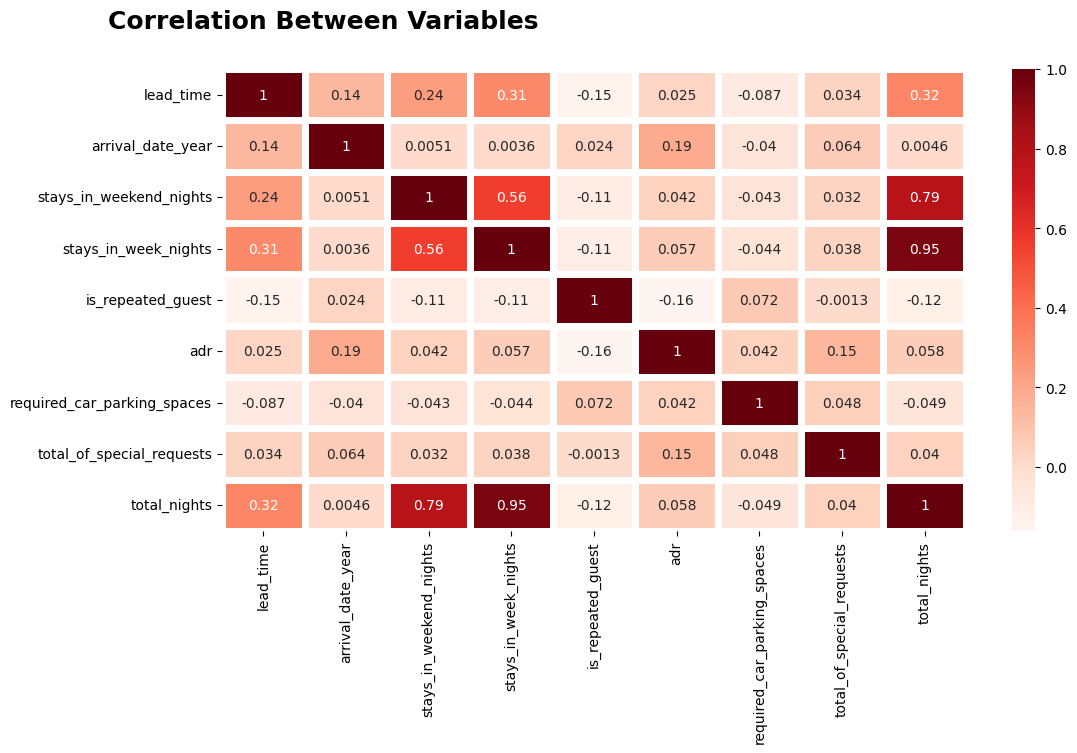

In [85]:
plt.rcParams['figure.figsize'] =(12, 6)
sns.heatmap(df_sub.corr(), annot=True, cmap='Reds', linewidths=5)
plt.suptitle('Correlation Between Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha = "left", fontsize='18', fontfamily='sans-serif', 
             color= "black")